 
### PROBLEM STATEMENT:

- The project aims to address the challenge of accurately predicting vehicle prices and condition of the car in the Australian market using supervised machine-learning techniques. By analyzing the Australian Vehicle Price Dataset, we seek to understand market dynamics, identify key features influencing pricing, and develop effective strategies to meet market demand and optimize pricing decisions.


- The ultimate goal is to deploy a robust machine-learning model that can provide reliable price predictions and contribute to enhancing competitiveness in the automotive industry.




### DATASET DESCRIPTION 
---

*This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing car prices in Australia. It contains 19 columns and about 16,734 rows.*



#### DATASET COLUMN DESCRIPTION 

-  `Brand`: Name of the car manufacturer.

-  `Year`: Year of manufacture or release

-  `Model`: Name or code of the car model

-  `Car/SUV`: Type of the car (CAR or SUV)

-  `Title`: Title or description of the car

-  `Used/New`: Condition of the car (used or new)

-  `Transmission`: Type of transmission (manual or automatic)

-  `Engine`: Engine capacity or power (in liters or kilowatts)

-  `DriveType`: Type of drive (front-wheel, rear-wheel, or all-wheel)

-  `FuelType`: Type of fuel (petrol, diesel, hybrid, or electric)

-  `FuelConsumption`: Fuel consumption rate (in liters per 100 km)

-  `Kilometres`: Distance traveled by the car (in kilometres)

-  `ColorExtint`: The color of the car (exterior and interior)

-  `Location`:  Location of the car (city and state)

-  `CylindersinEngine`:  Number of cylinders in the engine

-  `BodyType`: Shape or style of the car body (sedan, hatchback, coupe, etc.)

-  `Doors`: Number of doors in the car

-  `Seats`: Number of seats in the car

-  `Price`: Price of the car (in Australian dollars)

### PROJECT OBJECTIVES
---


1. *` Price Prediction `: Develop and deploy machine learning models to predict the price of a car based on its features.*

2. *` Car Condition Classification `: Implement a car condition classification model (Used/New) for efficient categorization.*

3. *` Market Analysis `: Conduct comprehensive market analysis to identify trends and insights for different car types using descriptive statistics and visualizations.*

4. *` Feature Analysis `: Perform in-depth feature analysis to determine the most influential factors affecting car prices across various models/brands.*

5. *` Model Deployment `: Prepare and deploy the developed models for practical use in the automotive industry.*


### *JUPYTER NOTEBOOKS*
---

- There are three notebooks (python file) where each task are performed; `data exploration/market analysis/feature anaylsis`, `regression task`, and `classification task`.

- For this notebook, we will run:

>- Data loading
>- Data Inspection
>- Data Cleaning and Preprocessing
>- Exploratory Analysis (Involving Market and Feature Analysis)


## IMPORTING NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport


#for visuals
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#data cleaning
from sklearn.impute import SimpleImputer


# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data Loading 

Data = pd.read_csv("Australian Vehicle Prices.csv")

Data

Brand    Year    Model               Car/Suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...     ...      ...                   ...   
16729         Toyota  2014.0  Alphard              SYC Cars   
16730  Mercedes-Benz  2012.0  S-Class        USED Dealer ad   
16731         Suzuki  2022.0   Vitara   Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                   SUV   
16733  Mercedes-Benz  2021.0     C200                 Sedan   

                                           Title UsedOrNew Transmission  \
0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                          2022 BMW 430I M Sport      USED    Automatic   
3               2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                     2022 Renault Arkana Intens      USED    Automatic   
...                                          ...       ...          ...   
16729                        2014 Toyota Alphard      USED    Automatic   
16730     2012 Mercedes-Benz S-Class CDI BlueTEC      USED    Automatic   
16731                    2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732                  2016 Mercedes-Benz GLC250      USED    Automatic   
16733                    2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
0      4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595   
1      4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16   
2        4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   
3      8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517   
4      4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   
...             ...       ...       ...             ...        ...   
16729             -     Front  Unleaded               -      66000   
16730             -      Rear    Diesel               -     117432   
16731  4 cyl, 1.6 L     Front  Unleaded  6.2 L / 100 km       5165   
16732    4 cyl, 2 L       AWD   Premium  7.2 L / 100 km      85525   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

        ColourExtInt             Location CylindersinEngine    BodyType  \
0      White / Black       Caringbah, NSW             4 cyl         SUV   
1      Black / Black       Brookvale, NSW             4 cyl   Hatchback   
2       Grey / White        Sylvania, NSW             4 cyl       Coupe   
3      White / Brown    Mount Druitt, NSW             8 cyl       Coupe   
4       Grey / Black     Castle Hill, NSW             4 cyl         SUV   
...              ...                  ...               ...         ...   
16729       Grey / -         Rocklea, QLD                 -  Commercial   
16730     Silver / -  Port Melbourne, VIC                 -         NaN   
16731     Yellow / -         Dinmore, QLD             4 cyl         SUV   
16732   Grey / Black          Albion, QLD             4 cyl         SUV   
16733       Gold / -          Yatala, QLD             4 cyl       Sedan   

          Doors     Seats   Price  
0       4 Doors   7 Seats   51990  
1       5 Doors   5 Seats   19990  
2       2 Doors   4 Seats  108988  
3       2 Doors   4 Seats   32990  
4       4 Doors   5 Seats   34990  
...         ...       ...     ...  
16729   7 Seats       NaN   29500  
16730       NaN       NaN   39888  
16731   4 Doors   5 Seats   35280  
16732   4 Doors   5 Seats   41888  
16733   4 Doors   5 Seats   65888  

[16734 rows x 19 columns]

In [3]:
#making a copy of the dataset
Data1 = Data.copy()
Data1

Brand    Year    Model               Car/Suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...     ...      ...                   ...   
16729         Toyota  2014.0  Alphard              SYC Cars   
16730  Mercedes-Benz  2012.0  S-Class        USED Dealer ad   
16731         Suzuki  2022.0   Vitara   Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                   SUV   
16733  Mercedes-Benz  2021.0     C200                 Sedan   

                                           Title UsedOrNew Transmission  \
0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                          2022 BMW 430I M Sport      USED    Automatic   
3               2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                     2022 Renault Arkana Intens      USED    Automatic   
...                                          ...       ...          ...   
16729                        2014 Toyota Alphard      USED    Automatic   
16730     2012 Mercedes-Benz S-Class CDI BlueTEC      USED    Automatic   
16731                    2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732                  2016 Mercedes-Benz GLC250      USED    Automatic   
16733                    2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
0      4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595   
1      4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16   
2        4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   
3      8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517   
4      4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   
...             ...       ...       ...             ...        ...   
16729             -     Front  Unleaded               -      66000   
16730             -      Rear    Diesel               -     117432   
16731  4 cyl, 1.6 L     Front  Unleaded  6.2 L / 100 km       5165   
16732    4 cyl, 2 L       AWD   Premium  7.2 L / 100 km      85525   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

        ColourExtInt             Location CylindersinEngine    BodyType  \
0      White / Black       Caringbah, NSW             4 cyl         SUV   
1      Black / Black       Brookvale, NSW             4 cyl   Hatchback   
2       Grey / White        Sylvania, NSW             4 cyl       Coupe   
3      White / Brown    Mount Druitt, NSW             8 cyl       Coupe   
4       Grey / Black     Castle Hill, NSW             4 cyl         SUV   
...              ...                  ...               ...         ...   
16729       Grey / -         Rocklea, QLD                 -  Commercial   
16730     Silver / -  Port Melbourne, VIC                 -         NaN   
16731     Yellow / -         Dinmore, QLD             4 cyl         SUV   
16732   Grey / Black          Albion, QLD             4 cyl         SUV   
16733       Gold / -          Yatala, QLD             4 cyl       Sedan   

          Doors     Seats   Price  
0       4 Doors   7 Seats   51990  
1       5 Doors   5 Seats   19990  
2       2 Doors   4 Seats  108988  
3       2 Doors   4 Seats   32990  
4       4 Doors   5 Seats   34990  
...         ...       ...     ...  
16729   7 Seats       NaN   29500  
16730       NaN       NaN   39888  
16731   4 Doors   5 Seats   35280  
16732   4 Doors   5 Seats   41888  
16733   4 Doors   5 Seats   65888  

[16734 rows x 19 columns]

## DATA INSPECTION 

In [4]:
#getting sample of the data
Data1.sample(5)

Brand    Year    Model Car/Suv  \
10969      Holden  2020.0  Equinox     SUV   
10575  Mitsubishi  2003.0   Lancer   Sedan   
445         Honda  2017.0     CR-V     SUV   
417    Mitsubishi  2018.0   Pajero     SUV   
181         Mazda  2015.0     CX-3     SUV   

                                               Title UsedOrNew Transmission  \
10969                   2020 Holden Equinox LT (fwd)      USED    Automatic   
10575          2003 Mitsubishi Lancer Evolution VIII      USED       Manual   
445                        2017 Honda CR-V VTI (2WD)      USED    Automatic   
417    2018 Mitsubishi Pajero Sport GLX (4X4) 5 Seat      USED    Automatic   
181                  2015 Mazda CX-3 S Touring (fwd)      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
10969  4 cyl, 1.5 L     Front  Unleaded  6.9 L / 100 km     100383   
10575    4 cyl, 2 L       AWD         -               -     162090   
445    4 cyl, 1.5 L     Front  Unleaded    7 L / 100 km      89077   
417    4 cyl, 2.4 L       4WD    Diesel    8 L / 100 km      72640   
181      4 cyl, 2 L     Front  Unleaded  6.1 L / 100 km      60581   

        ColourExtInt              Location CylindersinEngine BodyType  \
10969        Red / -        Wendouree, VIC             4 cyl      SUV   
10575  White / Black  Dingley Village, VIC             4 cyl    Sedan   
445    Black / Black   Port Macquarie, NSW             4 cyl      SUV   
417     Grey / Black   Port Macquarie, NSW             4 cyl      SUV   
181     Blue / Black      Castle Hill, NSW             4 cyl      SUV   

          Doors     Seats  Price  
10969   4 Doors   5 Seats  18975  
10575   4 Doors       NaN  37999  
445     4 Doors   5 Seats  27990  
417     4 Doors   5 Seats  41990  
181     4 Doors   5 Seats  22990

In [5]:
#Shape of the data
Data1.shape

(16734, 19)

### *We have 16,734 rows and 19 columns in the dataset*

In [6]:
#display information of the dataset
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

### *We have one numerical column (float type) and 18 non-numerical columns*

In [7]:
# columns of the data
Data1.columns.tolist()


['Brand',
 'Year',
 'Model',
 'Car/Suv',
 'Title',
 'UsedOrNew',
 'Transmission',
 'Engine',
 'DriveType',
 'FuelType',
 'FuelConsumption',
 'Kilometres',
 'ColourExtInt',
 'Location',
 'CylindersinEngine',
 'BodyType',
 'Doors',
 'Seats',
 'Price']

In [8]:
#Display the summary statistics of the numerical columns
Data1.describe().astype('int', 'float')

Year
count  16733
mean    2016
std        5
min     1940
25%     2013
50%     2017
75%     2020
max     2023

- We have just one result because we have just one numerical column; once we get to data cleaning, we will change the data types that needs to be changed and proceed to preprocessing. 

In [9]:
#check the data types of each columns
Data1.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

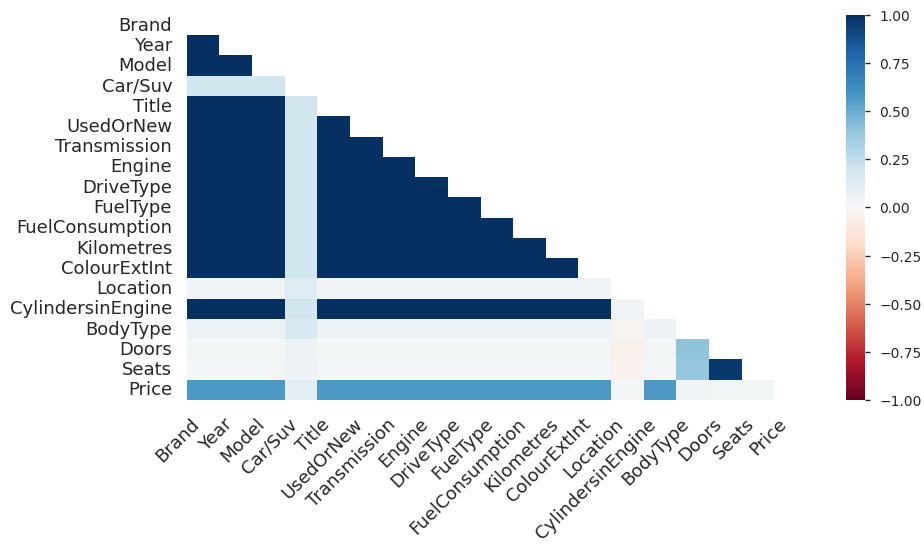

In [10]:

#Create a pandas profiling reports to gain more insights into the dataset
from ydata_profiling import ProfileReport

Data_profile = ProfileReport(Data1, title = 'Data Report')

Data_profile.to_notebook_iframe()

#### Summary Insight generated from the Profile Report

- There is the presence of missing values and no duplicate rows

- The Price column has a positive correlation with some of the columns like Transmission, Brand, Model, Used/New and so on

- There is a positive correlation between the number of seats and door variables.

*We will explore further to generate more insights.*

In [11]:
#Check for missing values
Data1.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

### *All columns have missing values and it will be cleaned as we go futher in our analysis*

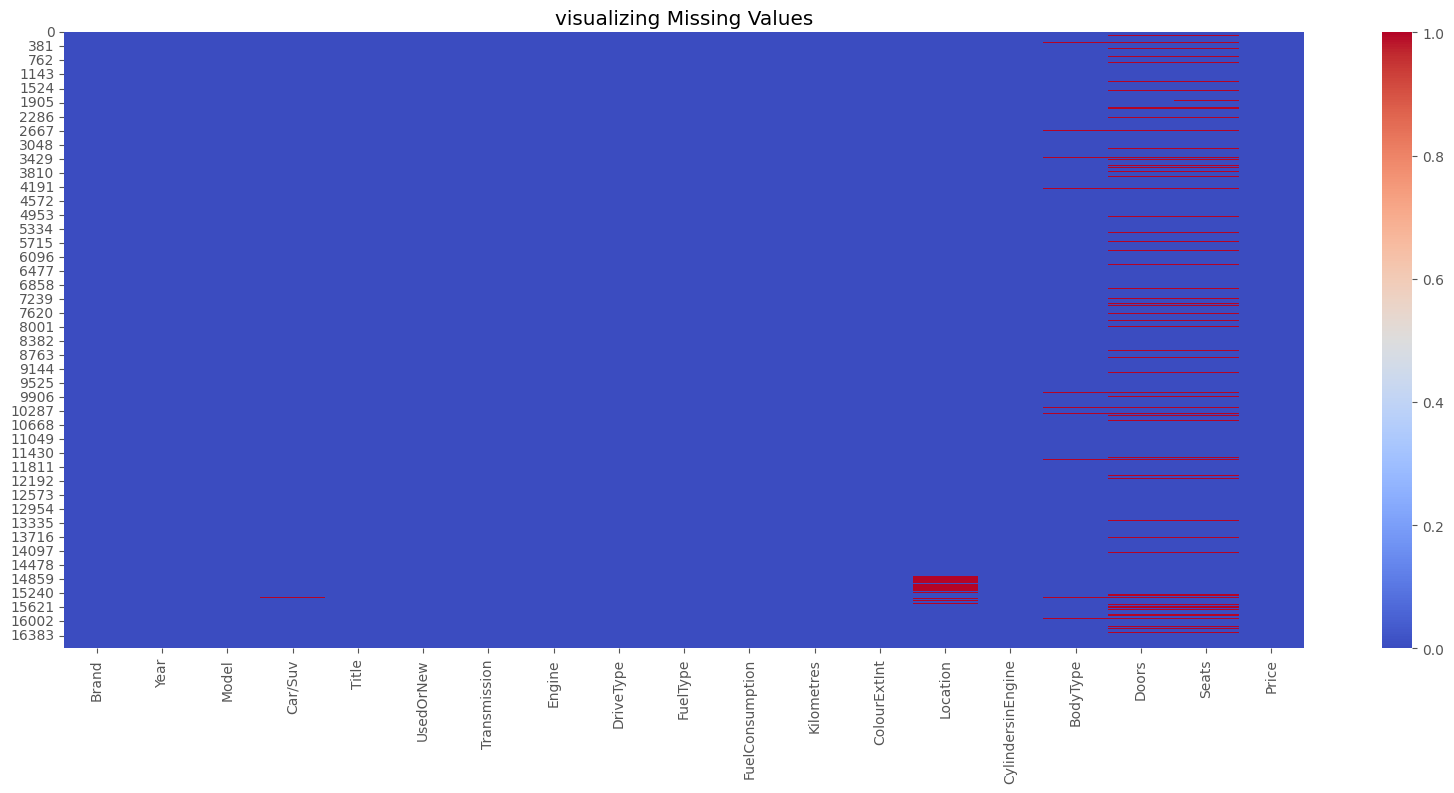

In [12]:
# Visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing Missing Values')
sns.heatmap(Data1.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

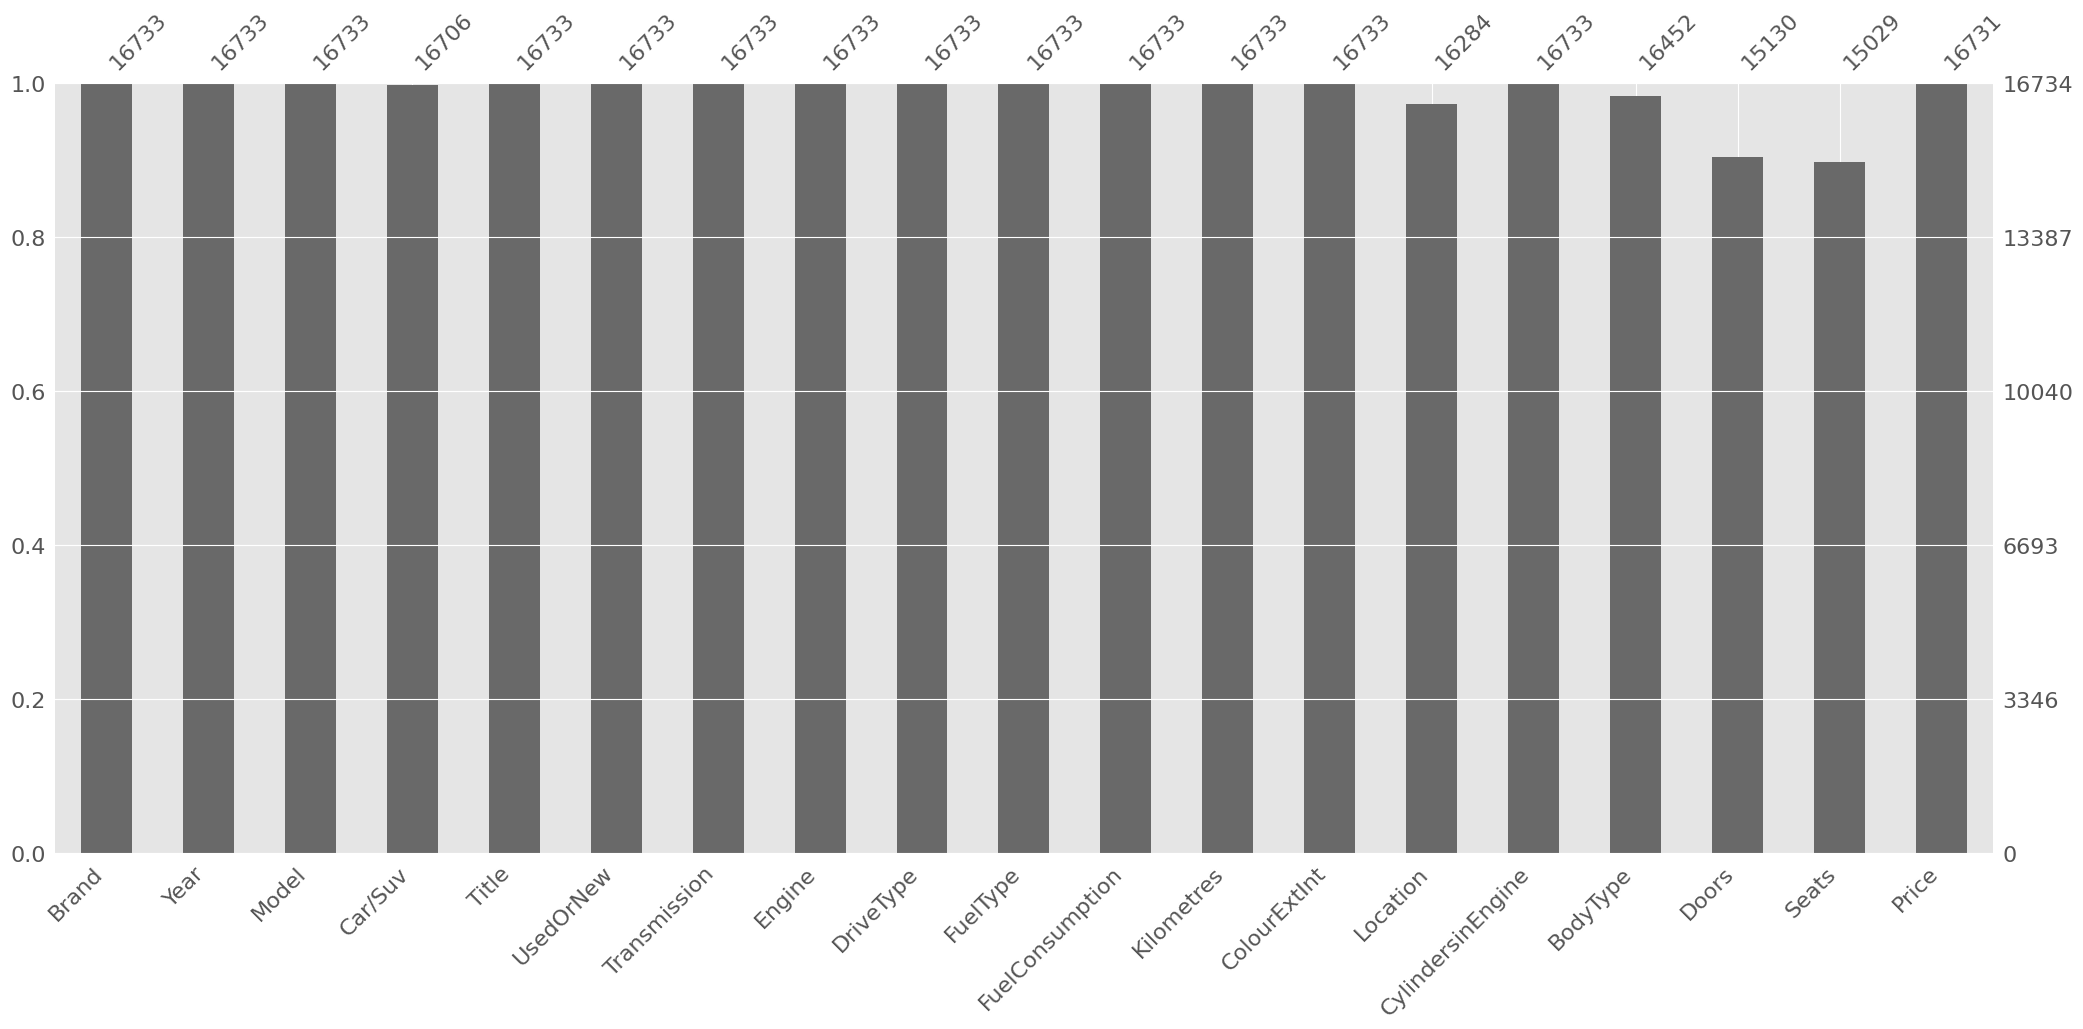

In [13]:
# Show the pattern of missingness to see how many missing cells are present
import missingno as msno
msno.bar(Data1)
plt.show()

In [14]:
#check for duplicates
Data1.duplicated().sum()

0

*There are no dupliate rows so we can go further to cleaning our data and adding new features in the dataset where needed.*

In [15]:
Data1.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16  Black / Black   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   Grey / White   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517  White / Brown   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   Grey / Black   

            Location CylindersinEngine   BodyType     Doors     Seats   Price  
0     Caringbah, NSW             4 cyl        SUV   4 Doors   7 Seats   51990  
1     Brookvale, NSW             4 cyl  Hatchback   5 Doors   5 Seats   19990  
2      Sylvania, NSW             4 cyl      Coupe   2 Doors   4 Seats  108988  
3  Mount Druitt, NSW             8 cyl      Coupe   2 Doors   4 Seats   32990  
4   Castle Hill, NSW             4 cyl        SUV   4 Doors   5 Seats   34990

In [16]:
#ADDING NEW FEATURES WHERE NEEDED 

#Creating a new column called Engine Volume in liters for the total volume drawn into all cylinders in the engine to get more organized data 
Data1['Engine_Volumes'] = Data1['Engine'].str.extract(r',\s*(.*)')

#head of the data
Data1.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16  Black / Black   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   Grey / White   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517  White / Brown   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   Grey / Black   

            Location CylindersinEngine   BodyType     Doors     Seats   Price  \
0     Caringbah, NSW             4 cyl        SUV   4 Doors   7 Seats   51990   
1     Brookvale, NSW             4 cyl  Hatchback   5 Doors   5 Seats   19990   
2      Sylvania, NSW             4 cyl      Coupe   2 Doors   4 Seats  108988   
3  Mount Druitt, NSW             8 cyl      Coupe   2 Doors   4 Seats   32990   
4   Castle Hill, NSW             4 cyl        SUV   4 Doors   5 Seats   34990   

  Engine_Volumes  
0          2.2 L  
1          1.5 L  
2            2 L  
3          5.5 L  
4          1.3 L

## DATA CLEANING AND PREPROCESSING

- Cleaning some columns and changing the data type to best interpret the columns
- Here, we will have to clean the columns individually, change the data types, and rename them if it calls for it. 



In [17]:
#Cleaning the Door variable
Data1['Doors'] = Data1['Doors'].str.extract('(\d+)').astype(float)

In [18]:
#Cleaning the Seat variable
Data1['Seats'] = Data1['Seats'].str.extract('(\d+)').astype(float)

In [19]:
#Changing the data type of the Price column and we are dropping the POA values in the Price column since its missing to maintain integrity
Data1['Price'] = Data1['Price'].replace('POA', np.nan)

# Convert the 'Price' column to float
Data1['Price'] = Data1['Price'].astype(float)

# Drop rows with NaN in the 'Price' column
Data1 = Data1.dropna(subset=['Price'])

In [20]:
#Changing the kilometres column to numerical
Data1['Kilometres'] = Data1['Kilometres'].str.replace('-', '').str.replace(' / ', '')

# Replacing empty strings with NaN
Data1['Kilometres'].replace('', np.nan, inplace=True)


# Converting the 'Kilometres' column to float
Data1['Kilometres'] = Data1['Kilometres'].astype(float)

In [21]:
#cleaning the Engine_Volumes column
Data1['Engine_Volumes'] = Data1['Engine_Volumes'].str.extract('(\d+\.\d+)').astype(float)

In [22]:
#Changing the Year column to integerr
# Convert infinity values to NaN
Data1["Year"].replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert the 'Years' column to numbers
Data1['Year'] = pd.to_numeric(Data1['Year'], errors='coerce')

# Round the 'Year' column to the nearest integer
Data1['Year'] = Data1['Year'].round().astype('Int64')

In [23]:
#rename the Engine_Volumes column to Engine_Volumes(litres)
Data1.rename(columns={"Engine_Volumes" : "Engine_Volumes(litres)"}, inplace = True)

In [24]:
#Ceaning the Transmission column
Data1['Transmission'] = Data1['Transmission'].str.replace('-', '')

# Replacing empty strings with NaN
Data1['Transmission'].replace('', np.nan, inplace=True)

In [25]:
#Ceaning the Fuel Type column
Data1['FuelType'] = Data1['FuelType'].str.replace('-', '')

# Replacing empty strings with NaN
Data1.loc[Data1['FuelType'] == '', 'FuelType'] = np.nan

In [26]:
#Cleaning the fuel consumption columns so that we can be able to perform aggregation on fuel consumptions 
# Splitting the values into separate columns
Data1[["Fuel_Consumption(litres)", "Fuel_Consumption_Per_Kilometers"]] = Data1['FuelConsumption'].str.split(' / ', expand=True)

# Converting the new columns to float and integer respectively
# Replacing '-' with NaN and then converting to float
Data1.loc[Data1["Fuel_Consumption(litres)"] == '-', "Fuel_Consumption(litres)"] = np.nan
Data1["Fuel_Consumption(litres)"] = Data1["Fuel_Consumption(litres)"].str.replace('L', '').astype(float)

Data1.loc[Data1["Fuel_Consumption_Per_Kilometers"] == '-', "Fuel_Consumption_Per_Kilometers"] = np.nan
Data1["Fuel_Consumption_Per_Kilometers"] = Data1["Fuel_Consumption_Per_Kilometers"].str.replace('km', '').astype(float)

In [27]:
# Clean the 'CylindersinEngine' variable
Data1['CylindersinEngine'] = Data1['CylindersinEngine'].str.replace('2 L', '').str.replace('0 L', '').str.replace('-', '')


# Replace empty strings with NaN in the 'CylindersinEngine' column
Data1.loc[Data1['CylindersinEngine'] == '', 'CylindersinEngine'] = np.nan

In [28]:
#Viewing the data to see the changes

Data1.head()

Brand  Year   Model               Car/Suv  \
0      Ssangyong  2022  Rexton  Sutherland Isuzu Ute   
1             MG  2022     MG3             Hatchback   
2            BMW  2022    430I                 Coupe   
3  Mercedes-Benz  2011    E500                 Coupe   
4        Renault  2022  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType  ...   ColourExtInt           Location  \
0  4 cyl, 2.2 L       AWD    Diesel  ...  White / Black     Caringbah, NSW   
1  4 cyl, 1.5 L     Front   Premium  ...  Black / Black     Brookvale, NSW   
2    4 cyl, 2 L      Rear   Premium  ...   Grey / White      Sylvania, NSW   
3  8 cyl, 5.5 L      Rear   Premium  ...  White / Brown  Mount Druitt, NSW   
4  4 cyl, 1.3 L     Front  Unleaded  ...   Grey / Black   Castle Hill, NSW   

  CylindersinEngine   BodyType Doors Seats     Price  Engine_Volumes(litres)  \
0             4 cyl        SUV   4.0   7.0   51990.0                     2.2   
1             4 cyl  Hatchback   5.0   5.0   19990.0                     1.5   
2             4 cyl      Coupe   2.0   4.0  108988.0                     NaN   
3             8 cyl      Coupe   2.0   4.0   32990.0                     5.5   
4             4 cyl        SUV   4.0   5.0   34990.0                     1.3   

   Fuel_Consumption(litres)  Fuel_Consumption_Per_Kilometers  
0                       8.7                            100.0  
1                       6.7                            100.0  
2                       6.6                            100.0  
3                      11.0                            100.0  
4                       6.0                            100.0  

[5 rows x 22 columns]

**Now, we have cleaned the columns and changed the data types to the right format as well as splitted some features**. 

- The fuel consumption and Engine column was splitted and the data type was changed to numerical format to correctly represent the columns.
- The Year column was changed to integers as well and infity values was replace with Nan which will be filled in the next data cleanng step.
- The columns with unexpected non-numerical values were filled with Nan and we will fill them as we go further in our data cleaning process.
- Kilometres and Price column were changes to float



In [29]:
#Dropping some columns that aren't relevant anymore after cleaning
Data1 = Data1.drop(["Engine", "FuelConsumption"], axis = 1)

In [30]:
#Showing the shape of our data
Data1.shape

#The shape has reduced becauuse we have dropped some rows

(16681, 20)

In [31]:
#showing the new of the dataset
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16681 non-null  object 
 1   Year                             16681 non-null  Int64  
 2   Model                            16681 non-null  object 
 3   Car/Suv                          16655 non-null  object 
 4   Title                            16681 non-null  object 
 5   UsedOrNew                        16681 non-null  object 
 6   Transmission                     16438 non-null  object 
 7   DriveType                        16681 non-null  object 
 8   FuelType                         16049 non-null  object 
 9   Kilometres                       16106 non-null  float64
 10  ColourExtInt                     16681 non-null  object 
 11  Location                         16232 non-null  object 
 12  CylindersinEngine      

**Due to the changes made to the dataset when we cleaned the columns, we now have 11 non-numerical columns (objects) and 9 numerical columns**

In [32]:
# select numerical variables
numerical_variables = Data1.select_dtypes(include = ['float', 'int64']).columns.tolist()
print(numerical_variables)

# value counts for numerical variables
for column in numerical_variables:
    print(Data1[column].value_counts())

['Year', 'Kilometres', 'Doors', 'Seats', 'Price', 'Engine_Volumes(litres)', 'Fuel_Consumption(litres)', 'Fuel_Consumption_Per_Kilometers']
Year
2018    1598
2019    1480
2017    1348
2022    1319
2023    1287
2020    1134
2016    1123
2021    1096
2015    1083
2014     876
2013     850
2012     696
2011     518
2010     454
2009     378
2008     325
2007     269
2006     220
2005     173
2004     117
2003      74
2002      64
2000      44
2001      37
1998      30
1999      29
1997       9
1994       9
1996       8
1993       6
1989       5
1990       5
1992       2
1985       2
1995       2
1981       2
1986       1
1991       1
1959       1
1970       1
1984       1
1975       1
1979       1
1978       1
1940       1
Name: count, dtype: Int64
Kilometres
10.0        126
15.0         94
20.0         83
7.0          58
22.0         49
           ... 
4220.0        1
57409.0       1
93518.0       1
169360.0      1
31852.0       1
Name: count, Length: 14254, dtype: int64
Doors
4.0     111

In [33]:
# select categorical variabes
categorical_variables = Data1.select_dtypes(include = ['object']).columns.tolist()
print(categorical_variables)

# value counts for categorical variables
for column in categorical_variables:
    print(Data1[column].value_counts())

['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType']
Brand
Toyota         2782
Hyundai        1231
Mazda          1169
Holden         1087
Ford           1055
               ... 
Proton            1
Daewoo            1
Hummer            1
Rolls-Royce       1
Packard           1
Name: count, Length: 76, dtype: int64
Model
Hilux          430
Corolla        405
Ranger         398
Landcruiser    370
I30            364
              ... 
Celerio          1
R-Class          1
Vectra           1
ES300            1
120              1
Name: count, Length: 781, dtype: int64
Car/Suv
SUV                               5918
Hatchback                         2364
Ute / Tray                        2067
Sedan                             1898
Wagon                              577
                                  ... 
Toowoomba Automotive Used Cars       1
Bay City Holden Used.                1
Auto Meg

### HANDLING MISSING VALUES 

In [34]:
#check for missing values

Data1.isnull().sum()

Brand                                 0
Year                                  0
Model                                 0
Car/Suv                              26
Title                                 0
UsedOrNew                             0
Transmission                        243
DriveType                             0
FuelType                            632
Kilometres                          575
ColourExtInt                          0
Location                            449
CylindersinEngine                  1765
BodyType                            279
Doors                              1587
Seats                              1688
Price                                 0
Engine_Volumes(litres)             7536
Fuel_Consumption(litres)           1681
Fuel_Consumption_Per_Kilometers    1681
dtype: int64

- All columns have missing values so we would handle them based on their data type
- Using Simple Imputer to handling missing values
- You can also notice increase in the number of missing values; this is because we cleaned and columns and replaced empty rows/special characters column with Nan values since they are empty. 

In [35]:
#check empty rows
all_nan_rows = Data1.isnull().all(axis=1)

all_nan_rows

0        False
1        False
2        False
3        False
4        False
         ...  
16729    False
16730    False
16731    False
16732    False
16733    False
Length: 16681, dtype: bool

In [36]:
#Handle missing values

def handle_missing_values(Data1, categorical_variables, numerical_variables):
    
    # Handling missing values for categorical data
    imputer_cat = SimpleImputer(strategy='most_frequent')
    Data1.loc[:, categorical_variables] = imputer_cat.fit_transform(Data1[categorical_variables])

    # Handling missing values for numerical data
    imputer_num = SimpleImputer(strategy='mean')
    Data1.loc[:, numerical_variables] = imputer_num.fit_transform(Data1[numerical_variables]).round(1)

    return Data1

In [37]:
#Calling the function on our dataset
Data1 = handle_missing_values(Data1, categorical_variables, numerical_variables)

In [38]:
Data1.head()

Brand  Year   Model               Car/Suv  \
0      Ssangyong  2022  Rexton  Sutherland Isuzu Ute   
1             MG  2022     MG3             Hatchback   
2            BMW  2022    430I                 Coupe   
3  Mercedes-Benz  2011    E500                 Coupe   
4        Renault  2022  Arkana                   SUV   

                                       Title UsedOrNew Transmission DriveType  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic       AWD   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic     Front   
2                      2022 BMW 430I M Sport      USED    Automatic      Rear   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic      Rear   
4                 2022 Renault Arkana Intens      USED    Automatic     Front   

   FuelType  Kilometres   ColourExtInt           Location CylindersinEngine  \
0    Diesel      5595.0  White / Black     Caringbah, NSW             4 cyl   
1   Premium        16.0  Black / Black     Brookvale, NSW             4 cyl   
2   Premium      8472.0   Grey / White      Sylvania, NSW             4 cyl   
3   Premium    136517.0  White / Brown  Mount Druitt, NSW             8 cyl   
4  Unleaded      1035.0   Grey / Black   Castle Hill, NSW             4 cyl   

    BodyType  Doors  Seats     Price  Engine_Volumes(litres)  \
0        SUV    4.0    7.0   51990.0                     2.2   
1  Hatchback    5.0    5.0   19990.0                     1.5   
2      Coupe    2.0    4.0  108988.0                     2.5   
3      Coupe    2.0    4.0   32990.0                     5.5   
4        SUV    4.0    5.0   34990.0                     1.3   

   Fuel_Consumption(litres)  Fuel_Consumption_Per_Kilometers  
0                       8.7                            100.0  
1                       6.7                            100.0  
2                       6.6                            100.0  
3                      11.0                            100.0  
4                       6.0                            100.0

In [39]:
#Changing Year to Integers
Data1['Year'] = Data1['Year'].astype(int)

In [40]:
#Changing Doors and Seats to Integers
Data1['Doors'] = Data1['Doors'].astype(int)
Data1['Seats'] = Data1['Seats'].astype(int)

In [41]:
#Displaying the general information to see if all the missing rows have beeen filled

Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16681 non-null  object 
 1   Year                             16681 non-null  int32  
 2   Model                            16681 non-null  object 
 3   Car/Suv                          16681 non-null  object 
 4   Title                            16681 non-null  object 
 5   UsedOrNew                        16681 non-null  object 
 6   Transmission                     16681 non-null  object 
 7   DriveType                        16681 non-null  object 
 8   FuelType                         16681 non-null  object 
 9   Kilometres                       16681 non-null  float64
 10  ColourExtInt                     16681 non-null  object 
 11  Location                         16681 non-null  object 
 12  CylindersinEngine      

In [42]:
Data1.isnull().sum() #Calling to check if we still have any missing values 

Brand                              0
Year                               0
Model                              0
Car/Suv                            0
Title                              0
UsedOrNew                          0
Transmission                       0
DriveType                          0
FuelType                           0
Kilometres                         0
ColourExtInt                       0
Location                           0
CylindersinEngine                  0
BodyType                           0
Doors                              0
Seats                              0
Price                              0
Engine_Volumes(litres)             0
Fuel_Consumption(litres)           0
Fuel_Consumption_Per_Kilometers    0
dtype: int64

**From the above output, our missing values have been handled well by using the def function "handle_missing_values" to perform a Simple Imputer task to fill/handle the missing data on categorical and numerical data.** 

In [43]:
#checking the consistency of each column data type. 

def check_data_type_consistency_single_column(Data1, column_name, expected_data_type):
    # Check if the data type of values in the specified column matches the expected data type
    is_consistent = Data1[column_name].apply(lambda x: isinstance(x, expected_data_type)).all()
    
    return is_consistent

In [44]:
#sample
column_name = 'Model'

# Specify the expected data type.
expected_data_type = float
is_consistent = check_data_type_consistency_single_column(Data1, column_name, expected_data_type)
print(f"Data type consistency in column '{column_name}': {is_consistent}")

Data type consistency in column 'Model': False


In [45]:
#We have to change the data type of the model column to string because it isnt consistent
Data1['Model'] = Data1['Model'].astype(str)

In [46]:
#for confirmation 
def check_data_type_consistency_single_column(Data1, column_name, expected_data_type):
    # Check if the data type of values in the specified column matches the expected data type
    is_consistent = Data1[column_name].apply(lambda x: isinstance(x, expected_data_type)).all()
    
    return is_consistent

In [47]:
column_name = 'Model'

# Specify the expected data type.
expected_data_type = str
is_consistent = check_data_type_consistency_single_column(Data1, column_name, expected_data_type)
print(f"Data type consistency in column '{column_name}': {is_consistent}")

Data type consistency in column 'Model': True


In [48]:
Data1["Model"].unique()

array(['Rexton', 'MG3', '430I', 'E500', 'Arkana', 'Estima', 'Rover',
       'Pulsar', '86', 'Jazz', 'HiAce', 'City', 'Golf', 'X3', 'Outlander',
       '118D', 'Fiesta', 'Amarok', 'Outback', 'Mirage', 'Camry', '3',
       'I45', 'Territory', 'Qashqai', 'T-Cross', 'Tucson', 'Focus',
       'X-Trail', 'Corolla', 'Yaris', 'Grand', 'Patriot', 'S60', 'Triton',
       'E250', 'A250', 'CX-5', 'Falcon', '595', 'CR-V', 'I30', '6',
       'Kluger', 'Santa', 'Cascada', 'ML320', 'Lancer', 'A5', 'RIO',
       'Cherokee', 'Tiguan', 'ASX', '220I', 'Imax', 'XV', 'Cooper', '308',
       'Commodore', 'I20', 'BT-50', 'Vezel', 'CX-7', 'Renegade',
       'Elgrand', 'Impreza', 'X4', '118I', 'C-CLASS', 'Q7', 'Celerio',
       'Liberty', 'C-HR', 'Forester', 'CX-3', 'Cruze', 'RAV4', 'CLC200',
       'Journey', 'Caddy', 'Civic', 'Compass', 'CX-9', 'Ranger',
       'Captiva', '2', 'M135I', '330I', 'Q3', 'Accent', 'B-Class',
       'Sportage', 'Cayenne', 'Cayman', 'Swift', 'Navara', 'Hijet',
       'Hilux', 'Venue

### ***HANDLING OUTLIERS***

### INTERQUARTILE RANGE (IQR) METHOD

*Calling on the dataset to handle outliers using the `Interquartile Range Method (IQR)` to see if there will be changes in our data when handling the outliers*

Numercial Columns with outliers:
Year
Kilometres
Doors
Seats
Price
Engine_Volumes(litres)
Fuel_Consumption(litres)


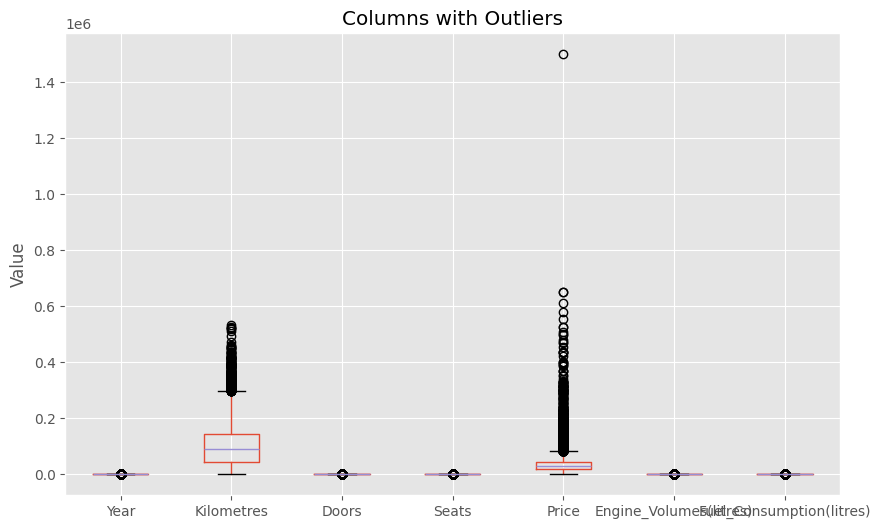

In [49]:
#Viewing the columns with outliers
#defining the first quartile "Q1" and third quartile "Q3"

Q1 = Data1[numerical_variables].quantile(0.25)
Q3 = Data1[numerical_variables].quantile(0.75)
IQR = Q3 - Q1

# Find columns with outliers on our original data
outliers = ((Data1[numerical_variables] < (Q1 - 1.5 * IQR)) | (Data1[numerical_variables] > (Q3 + 1.5 * IQR))).any()

# Plot box plots for columns with outliers
outlier_cols = outliers[outliers].index

# Print the names of columns with outliers
print("Numercial Columns with outliers:")
for col in outlier_cols:
    print(col)

#plotting columns with outliers
plt.figure(figsize=(10, 6))
Data1[outlier_cols].boxplot()
plt.title('Columns with Outliers')
plt.ylabel('Value')

plt.show()

***We would handle outliers on the Kilometres Column to maintain integrity when translatiing our insight so that we can have more accurate result. Some car prices ccan have extreme values becasue of price difference based on the car brand/model; it is possible to have cars that are extremely expensive***


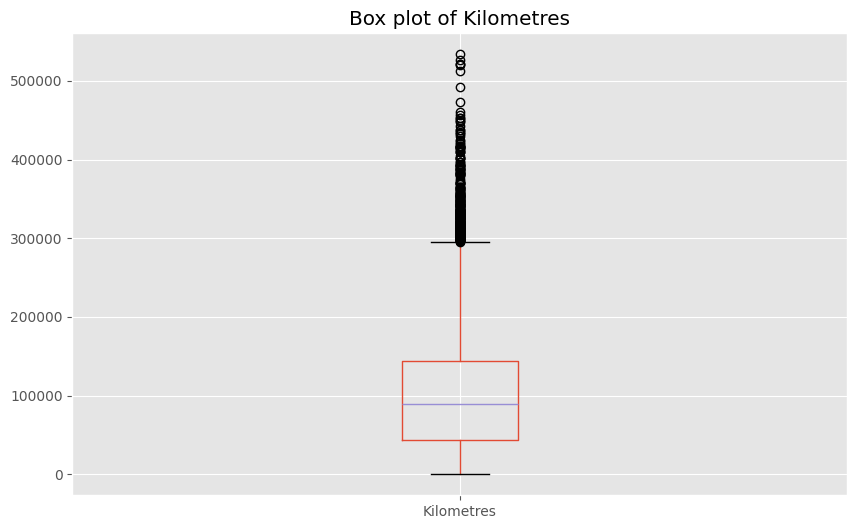

In [50]:
#Visualizng the Kilometres column using box plot
plt.figure(figsize=(10, 6))
Data1.boxplot(column=["Kilometres"])

plt.title("Box plot of Kilometres")
plt.show()

In [51]:
#Handling outliers on the kilometres column 
Q1 = Data1["Kilometres"].quantile(0.25)
Q3 = Data1["Kilometres"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop rows with outliers
Data1 = Data1[(Data1["Kilometres"] >= lower_bound) & (Data1["Kilometres"] <= upper_bound)]

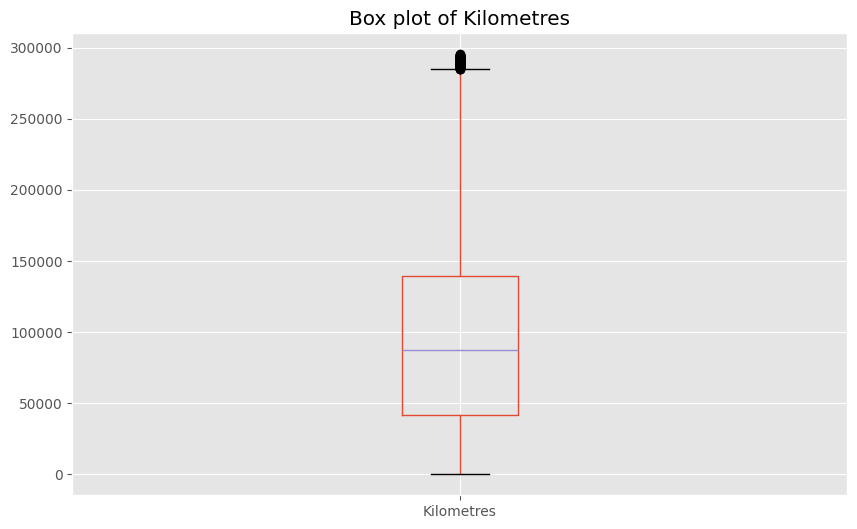

In [52]:
#Visualizng the Kilometres column to see if the outliers have been handled
plt.figure(figsize=(10, 6))
Data1.boxplot(column=["Kilometres"])

plt.title("Box plot of Kilometres")
plt.show()

***From our plot, the outliers have been handled, now we can process to other analysis***

In [53]:
#saving our cleaned dataset to a csv file
Australia_Vehicle_Price_Cleaned = Data1.to_csv("Cleaned_Australian_Vehicle_Price_Data.csv", index = False)

#here we have it saved in our directory with the name "Cleaned Australia Vehicle Price Data"

### **Now that we have pre-processed and cleaned our dataset, the cleaned data is saved in a CSV file and we can now proceed to our Exploratory Analysis**

## EXPLORATORY ANALYSIS

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Market Analysis
- Feature Analysis


In [54]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16376 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16376 non-null  object 
 1   Year                             16376 non-null  int32  
 2   Model                            16376 non-null  object 
 3   Car/Suv                          16376 non-null  object 
 4   Title                            16376 non-null  object 
 5   UsedOrNew                        16376 non-null  object 
 6   Transmission                     16376 non-null  object 
 7   DriveType                        16376 non-null  object 
 8   FuelType                         16376 non-null  object 
 9   Kilometres                       16376 non-null  float64
 10  ColourExtInt                     16376 non-null  object 
 11  Location                         16376 non-null  object 
 12  CylindersinEngine      

In [55]:
#descriptive analysis
Data1.describe().round()

Year  Kilometres    Doors    Seats      Price  \
count  16376.0     16376.0  16376.0  16376.0    16376.0   
mean    2016.0     95691.0      4.0      5.0    37712.0   
std        5.0     69367.0      1.0      1.0    37374.0   
min     1940.0         1.0      2.0      2.0       88.0   
25%     2014.0     41969.0      4.0      5.0    19888.0   
50%     2017.0     87630.0      4.0      5.0    29905.0   
75%     2020.0    139256.0      4.0      5.0    44388.0   
max     2023.0    295414.0     12.0     22.0  1500000.0   

       Engine_Volumes(litres)  Fuel_Consumption(litres)  \
count                 16376.0                   16376.0   
mean                      2.0                       8.0   
std                       1.0                       2.0   
min                       1.0                       0.0   
25%                       2.0                       7.0   
50%                       2.0                       8.0   
75%                       2.0                       8.0   
max                      10.0                      27.0   

       Fuel_Consumption_Per_Kilometers  
count                          16376.0  
mean                             100.0  
std                                0.0  
min                              100.0  
25%                              100.0  
50%                              100.0  
75%                              100.0  
max                              100.0

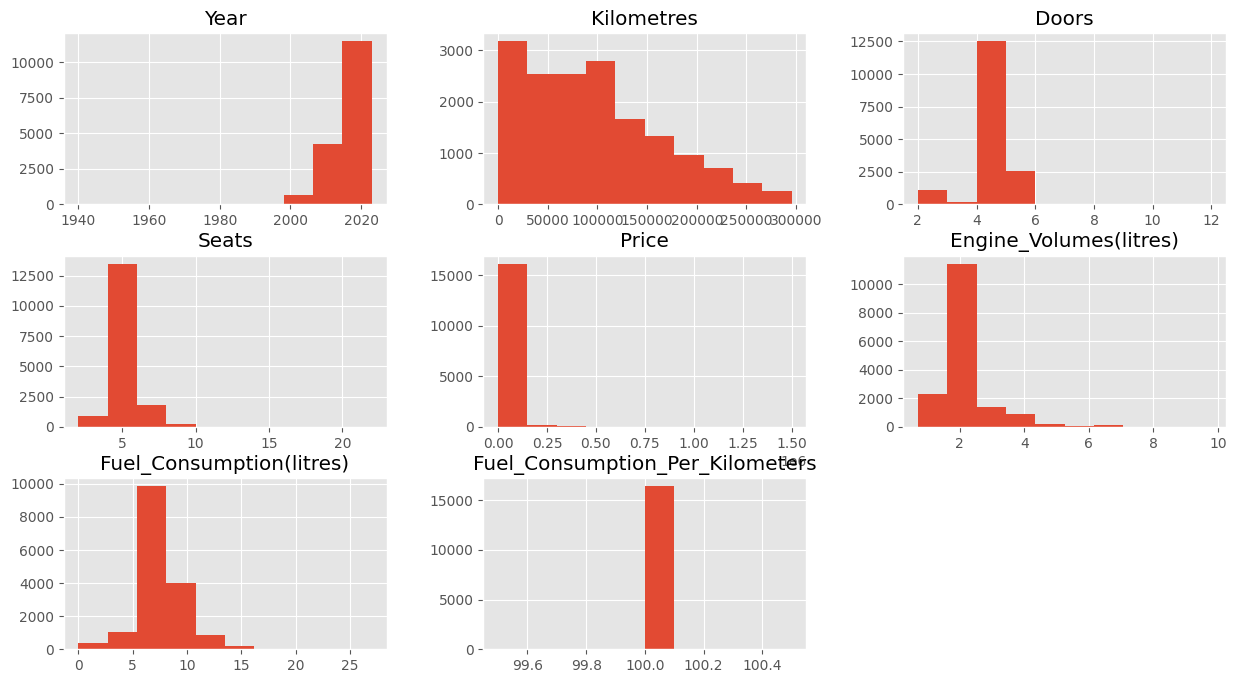

In [56]:
#General Histogram Distribution 
Data1.hist(figsize = (15,8));

**This plot shows the value distribution for all numerical columns. It plots a histogram chart showing distribution through each value in each column.** 

### *INSIGHTS GENERATED*

- There is a constant value of Fuel consumption per kilometres which is 100km for all entries

- The average price of vehicles is 29905 and the highest price is 1,500,000 Australian with the lowest price being 88 Australian dollars.


- This histogram for kilometres(distance traveled by car) illustrates the distribution of kilometers driven by the cars, showing a right-skewed distribution with most cars having lower kilometers.

- The number of doors on the cars, with 4-door cars being the most prevalent in the dataset.

- This histogram plot for Seats in the car shows that 5-seat cars are the most common.

- The distribution of car prices is visualized, indicating a right-skewed distribution with more cars at lower price ranges.

- The histogram that represents the distribution of engine volumes in liters shows smaller engine volumes being more common.

- The distribution of fuel consumption in liters, showing a right-skewed distribution with lower fuel consumption values being more prevalent



### ***UNIVARIATE ANALYSIS***

- Univariate analysis is a statistical method used to analyze data involving a single variable at a time.

In [57]:
#value count for car condition (Used/New)
Car_condition = Data1["UsedOrNew"].value_counts()

Car_condition

UsedOrNew
USED    14679
NEW      1191
DEMO      506
Name: count, dtype: int64

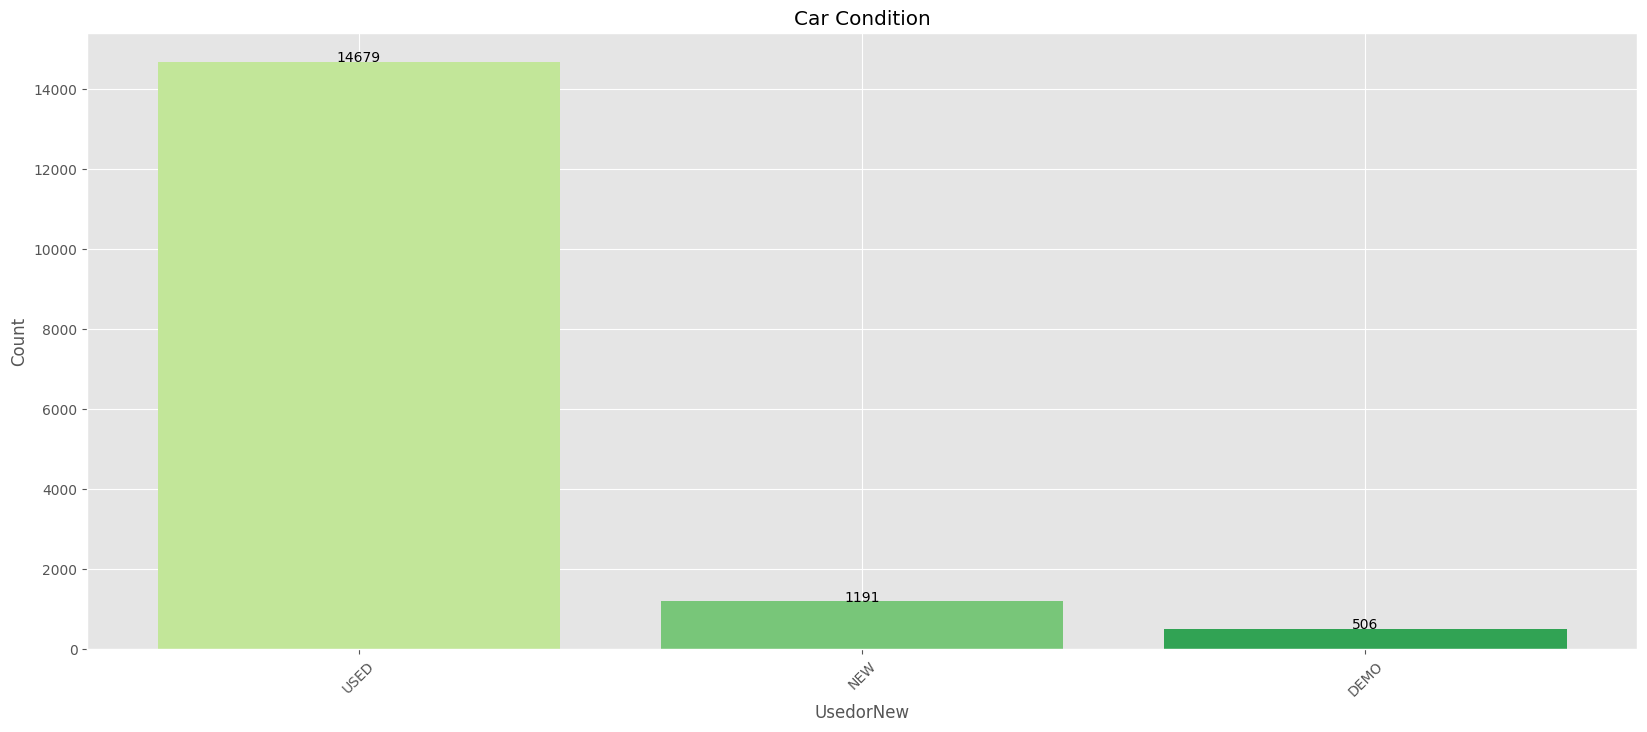

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#c2e699', '#78c679', '#31a354']

# Customize the bar chart
ax.bar(Car_condition.index, Car_condition.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(Car_condition.values):
    ax.text(i, v+5, str(v), ha='center')

# Add labels and title
ax.set_xlabel('UsedorNew')
ax.set_ylabel('Count')
ax.set_title('Car Condition')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


***From the plot, `Used car` have the highest count with a value of 14679, and `New cars` have a value count of 1191 making `Demo cars` have the lowest count with a value of 506***

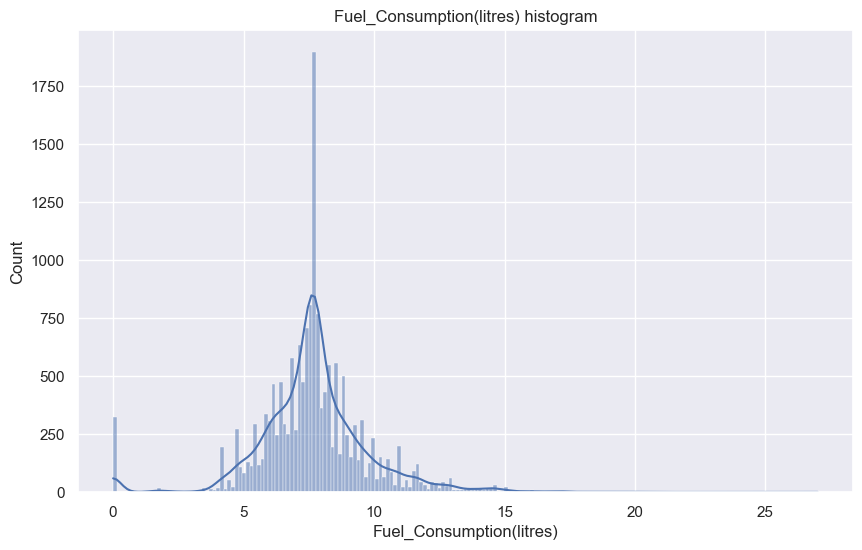

In [59]:
#Visualizing Fuel consumption in liters
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=Data1, x='Fuel_Consumption(litres)', kde=True)
plt.title('Fuel_Consumption(litres) histogram')
plt.show()

***The distribution appears to be approximately normal, with a bell-shaped curve overlaid on the bars. The curve follows the distribution pattern of the data. The histogram provides a visual representation of the distribution of fuel consumption values, highlighting the most common values and the overall shape of the distribution. The highest bar is around the 10-litre mark, suggesting that this value is the most common in the dataset.***

In [60]:
#value count for Fuel Type 
Fuel_Type = Data1["FuelType"].value_counts()

Fuel_Type

FuelType
Unleaded    7470
Diesel      4715
Premium     3366
Hybrid       649
Electric     115
Other         42
LPG           14
Leaded         5
Name: count, dtype: int64

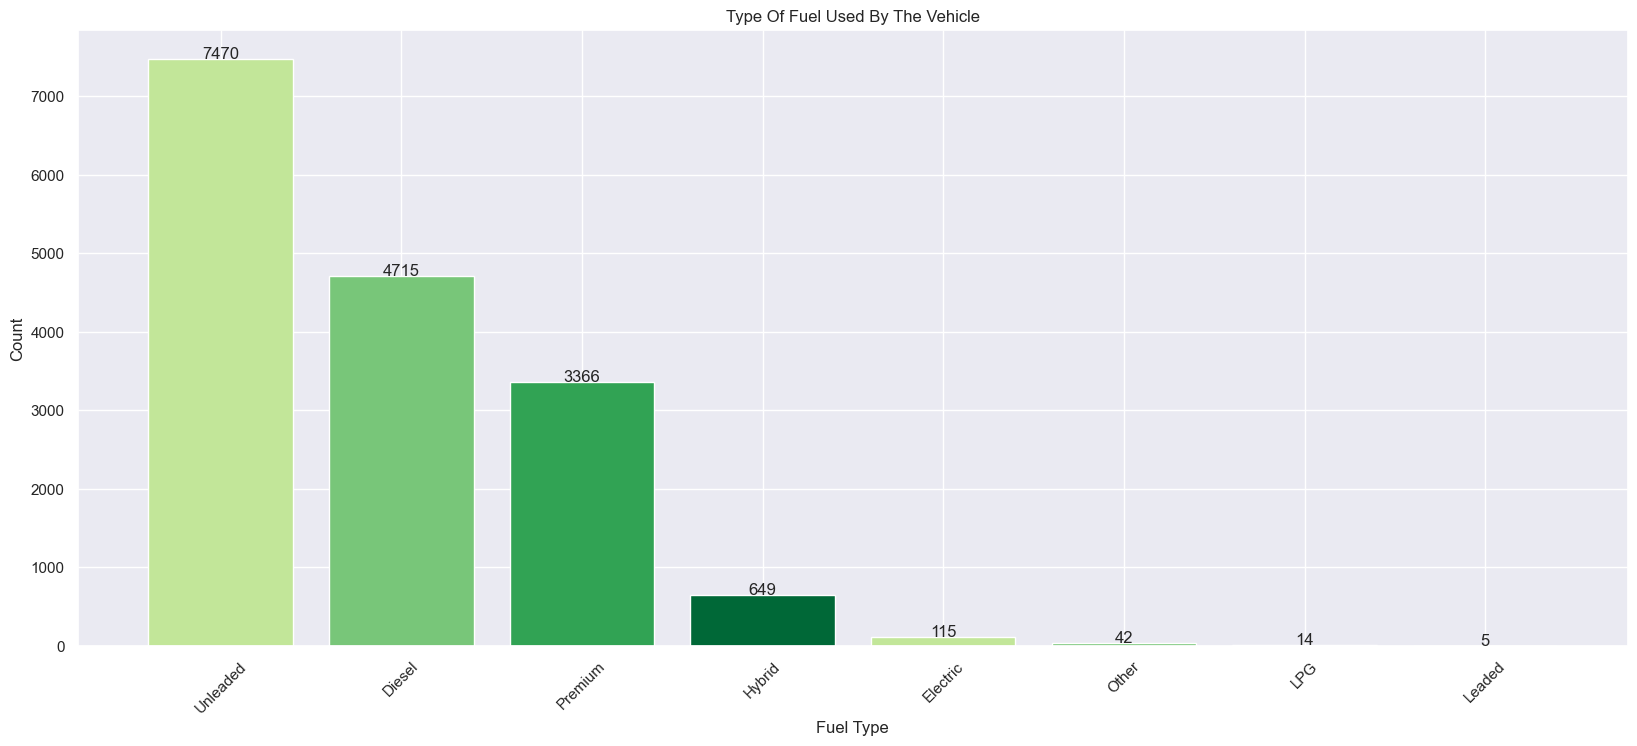

In [61]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#c2e699', '#78c679', '#31a354', '#006837']

# Customize the bar chart
ax.bar(Fuel_Type.index, Fuel_Type.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(Fuel_Type.values):
    ax.text(i, v+5, str(v), ha='center')

# Add labels and title
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Count')
ax.set_title('Type Of Fuel Used By The Vehicle')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***From the plot, `Unleaded Fuel Type` followed by `Diesel fuel type` are the commonly used fuel types for the vehicles which makes `LPG and leaded` the lowest type of fuel used**

In [62]:
#value count for Transmission (Manual/Automatic)
Transmission_Type = Data1["Transmission"].value_counts()
Transmission_Type

Transmission
Automatic    14550
Manual        1826
Name: count, dtype: int64

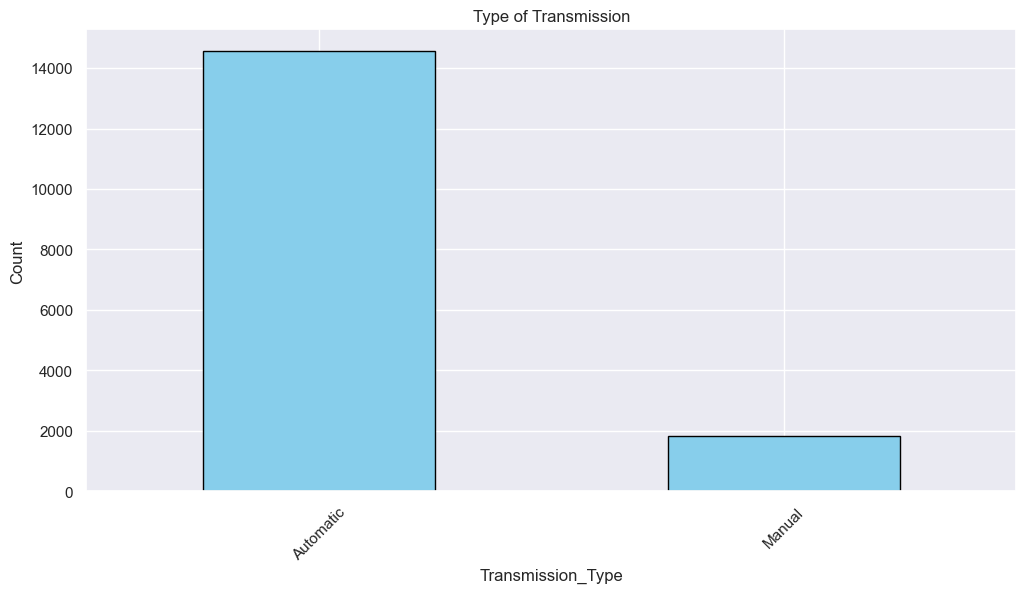

In [63]:
#bar plot for Transmission Type
Transmission_Type.plot(kind='bar', color='skyblue', edgecolor = 'black',figsize = (12, 6))
plt.xticks(rotation=45)
plt.title('Type of Transmission')
plt.xlabel('Transmission_Type')
plt.ylabel('Count')
plt.show()

***Most vechicles have `Automatic Transmission Type` compared to `Manual Transmission type`***

In [64]:
#value count for Drive Type of the vehile
Drive_Type = Data1["DriveType"].value_counts()
Drive_Type

DriveType
Front    6925
AWD      3098
4WD      2979
Rear     2263
Other    1111
Name: count, dtype: int64

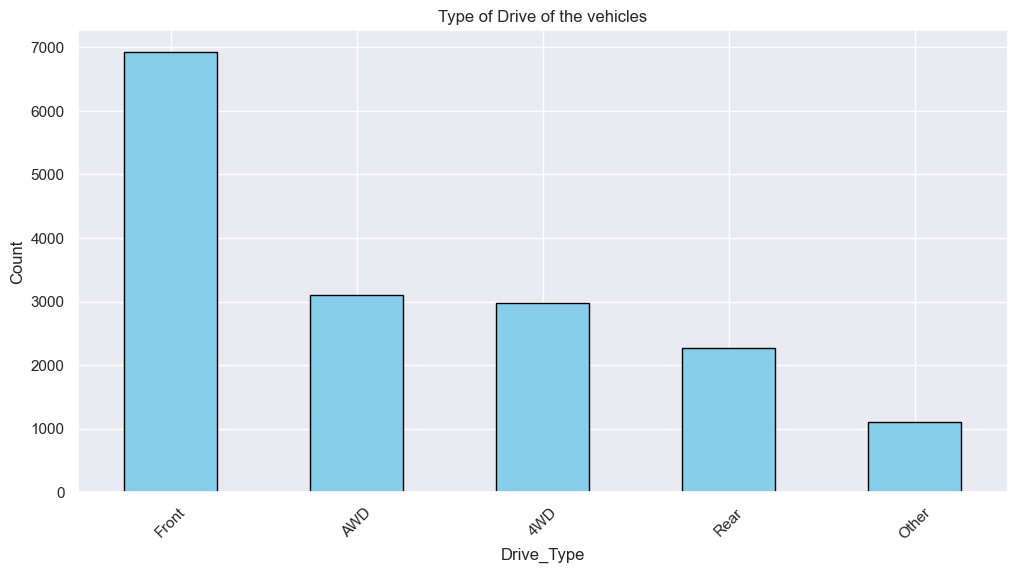

In [65]:
#Plot to show distribution of drive type 
Drive_Type.plot(kind='bar', color='skyblue', edgecolor = 'black',figsize = (12, 6))
plt.xticks(rotation=45)
plt.title('Type of Drive of the vehicles')
plt.xlabel('Drive_Type')
plt.ylabel('Count')
plt.show()

***`Front Wheel` drive type is the most common type of drive while `Rear wheel and others` are the lowest type of drive***

In [66]:
#value count for Body Type of the vehicle
Body_Type = Data1["BodyType"].value_counts()
Body_Type

BodyType
SUV             7051
Hatchback       2680
Ute / Tray      2396
Sedan           1963
Wagon           1198
Commercial       582
Coupe            335
Convertible      130
Other             23
People Mover      18
Name: count, dtype: int64

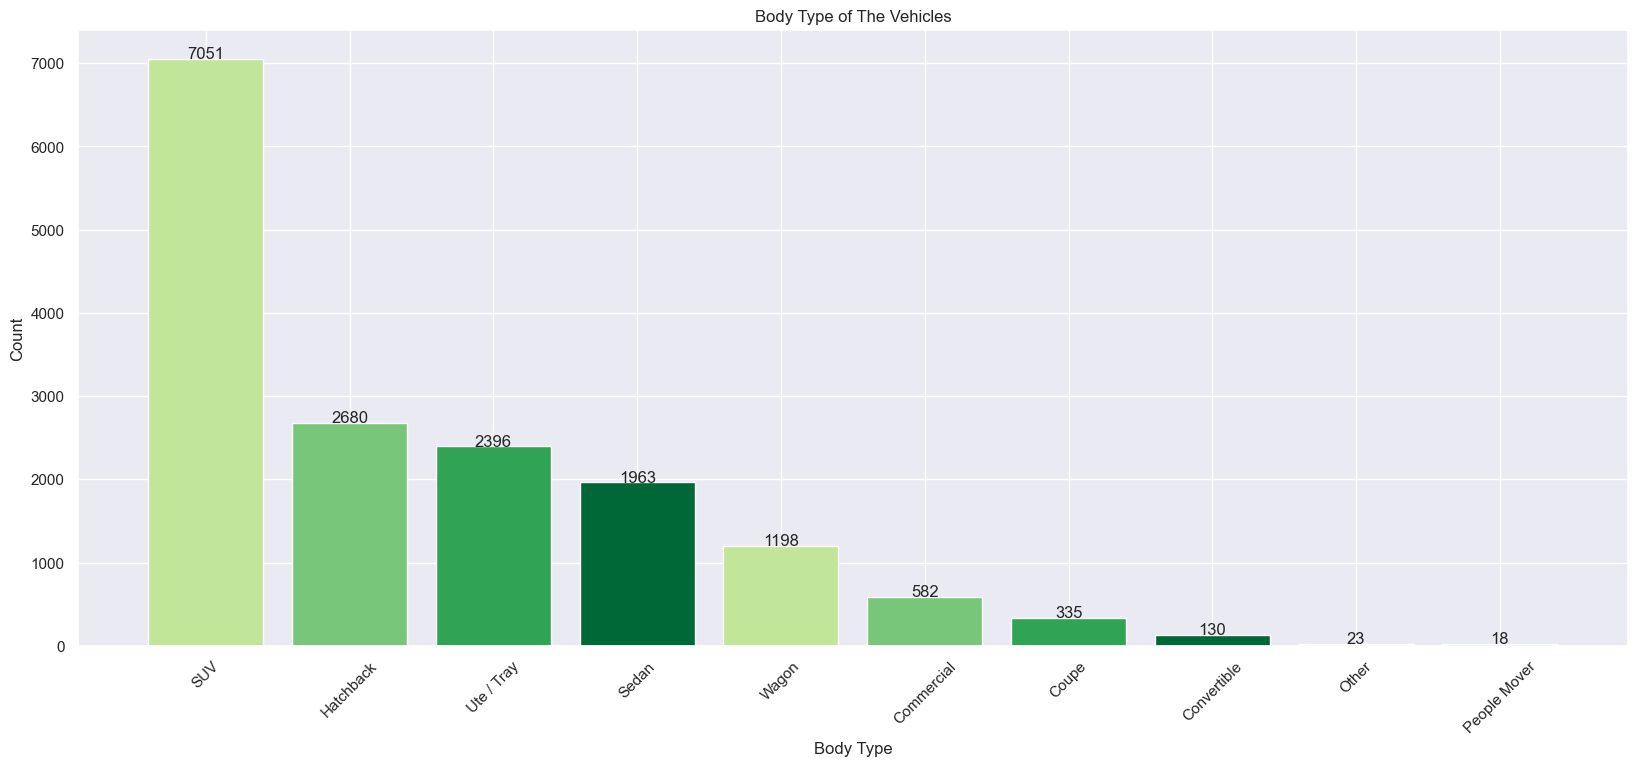

In [67]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#c2e699', '#78c679', '#31a354', '#006837']

# Customize the bar chart
ax.bar(Body_Type.index, Body_Type.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(Body_Type.values):
    ax.text(i, v+5, str(v), ha='center')

# Add labels and title
ax.set_xlabel('Body Type')
ax.set_ylabel('Count')
ax.set_title('Body Type of The Vehicles')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***`SUV and Hatchback` is the most common shape/style of the car body while `People Mover` is the least popular***

In [68]:
#vShowing the top 10 vehicle brand
Brand_Type = Data1["Brand"].value_counts()[:10]
Brand_Type

Brand
Toyota           2655
Hyundai          1224
Mazda            1156
Holden           1055
Ford             1030
Mitsubishi       1011
Nissan            999
Volkswagen        886
Kia               803
Mercedes-Benz     614
Name: count, dtype: int64

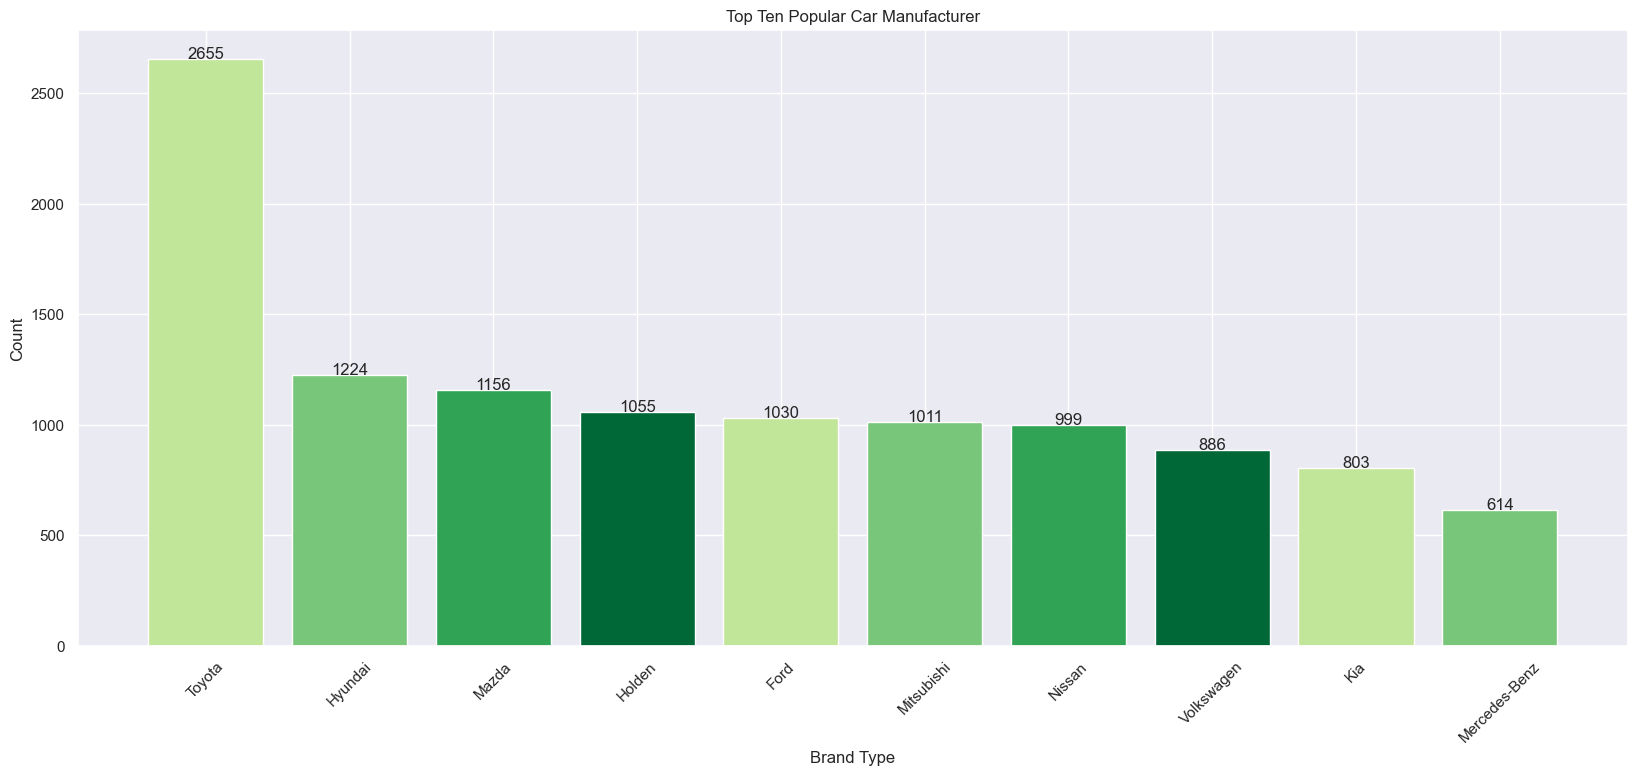

In [69]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#c2e699', '#78c679', '#31a354', '#006837']

# Customize the bar chart
ax.bar(Brand_Type.index, Brand_Type.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(Brand_Type.values):
    ax.text(i, v+5, str(v), ha='center')

# Add labels and title
ax.set_xlabel('Brand Type')
ax.set_ylabel('Count')
ax.set_title('Top Ten Popular Car Manufacturer')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***Based on the insight generated on brand type (car manufacturers), `Toyota` and `Hyundai` have the highest count making them the most popular car brands in the Australian vehicle dataset***

- The top 10 car brands are visualized in the plot above showing their number counts as well respectively and they are:

  >- Toyota
  >- Hyundai
  >- Mazda
  >- Holden
  >- Ford
  >- Mitsubishi
  >- Nissan
  >- Volkswagen
  >- Kia
  >- Mercedes-Benz


In [70]:
#vShowing the value count of cylinders
No_of_Cylinders = Data1["CylindersinEngine"].value_counts()
No_of_Cylinders

CylindersinEngine
4 cyl     13029
6 cyl      2017
8 cyl       587
5 cyl       391
3 cyl       329
12 cyl       16
2 cyl         4
10 cyl        3
Name: count, dtype: int64

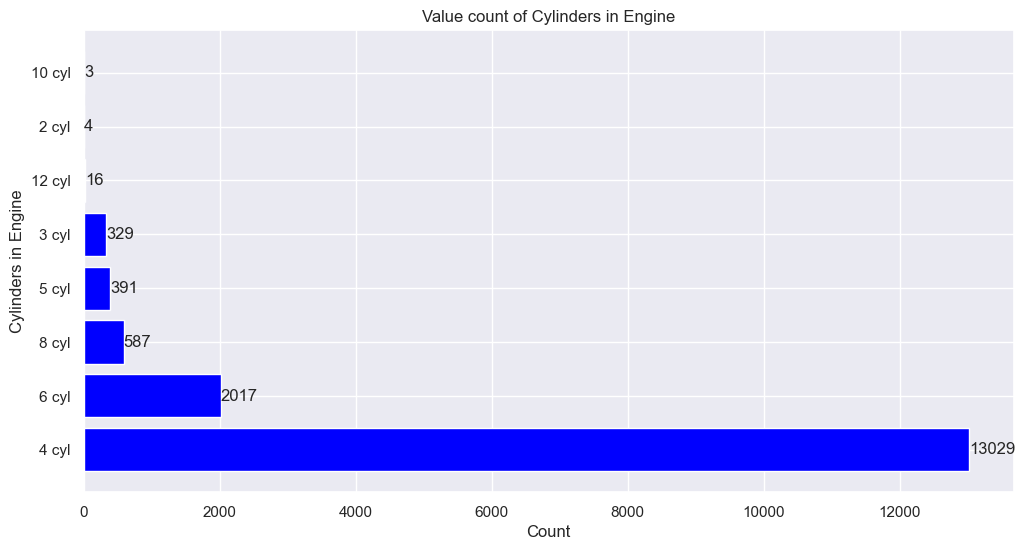

In [71]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Customize the bar chart
ax.barh(No_of_Cylinders.index, No_of_Cylinders.values, color='blue')

# Add data labels to the bars
for i, v in enumerate(No_of_Cylinders.values):
    ax.text(v+0.05, i, str(v), ha='left', va='center')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Cylinders in Engine')
ax.set_title('Value count of Cylinders in Engine')

# Show the plot
plt.show()


***4 cylinders in Engine have the highest count followed by 6 cylinders and 8 cylinders haviong 10 cylinders as the lowest***

### ***BIVARIATE ANALYSIS***

- Bivariate analysis is a statistical method used to analyze the relationship between two variables simultaneously.

In [72]:
##Checking variation of price of vehicle to year.
Price_across_years = Data1.groupby('Year')['Price'].mean().sort_values(ascending = False).round()

Price_across_years

Year
1959    1500000.0
1984     148880.0
1970     129990.0
1978      97500.0
2023      75898.0
1990      71465.0
1986      69990.0
1940      64990.0
2022      59639.0
1985      59495.0
2021      49199.0
1993      48920.0
1994      48308.0
2020      45319.0
1995      44938.0
2019      42278.0
1975      39990.0
1989      39573.0
2018      38327.0
2017      35965.0
2016      32453.0
1979      29888.0
1998      29505.0
2015      28369.0
1996      25255.0
1997      24133.0
1999      24121.0
2014      23862.0
2002      23146.0
2013      20773.0
2001      20194.0
2000      20189.0
2012      19565.0
1981      19545.0
2008      17716.0
2011      17710.0
1992      17688.0
2007      17011.0
2010      16914.0
2003      15861.0
2009      15242.0
2005      15178.0
2006      14181.0
2004      13171.0
Name: Price, dtype: float64

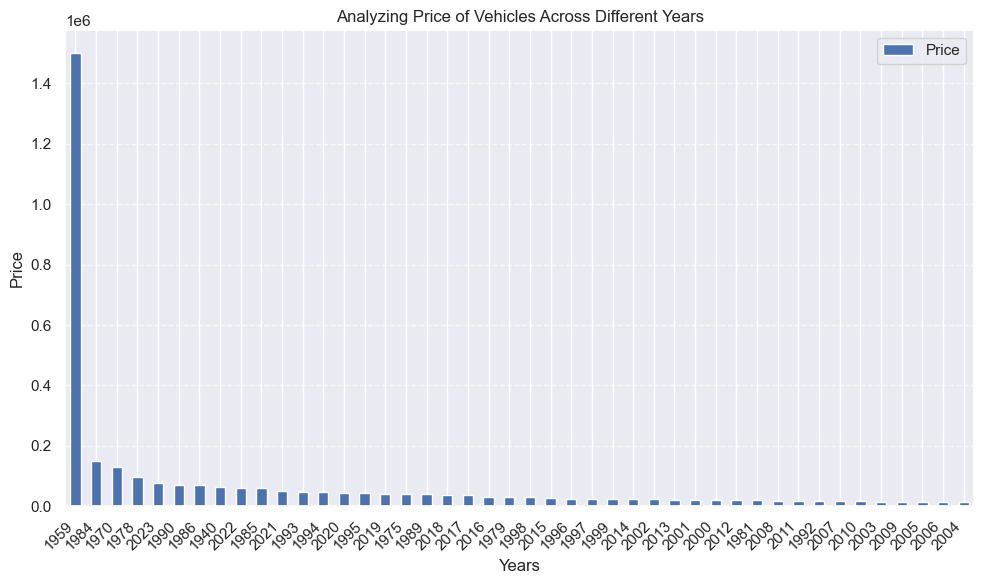

In [73]:
#ploting to see the price across different years
Price_across_years.plot(kind='bar', figsize=(10, 6), rot = 45)
plt.title('Analyzing Price of Vehicles Across Different Years')
plt.xlabel('Years')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

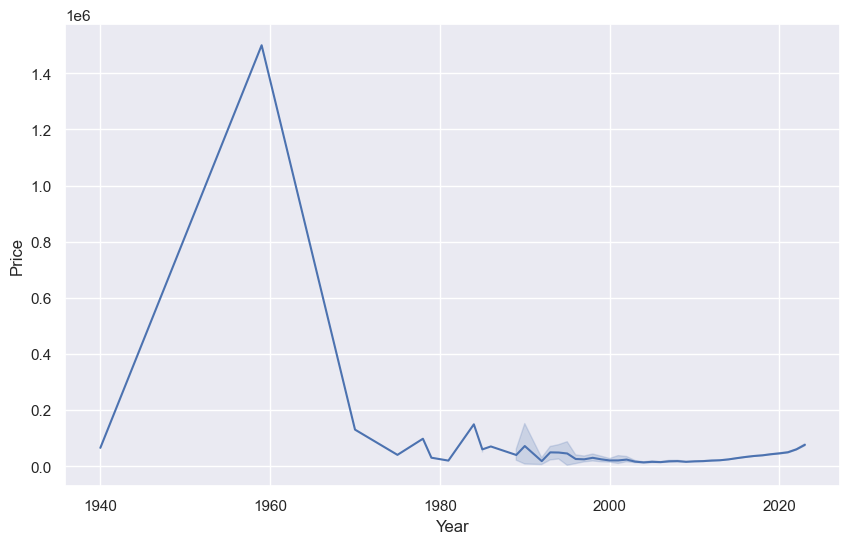

In [74]:
#Showing Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=Data1, x='Year', y='Price')
plt.show()

### ***INSIGHT GENERATED***
- There is a notable spike in prices in the year 1959, with the price peaking at 1,500,000 Australian Dollars
- There is a sharp decline in prices across the rest of the year.
- With the Year 2004 as the year with the lowest price

In [75]:
#Showing the variation of price of vehicle based on Car condition
Price_wrt_Car_Condition = Data1.groupby('UsedOrNew')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_Car_Condition

UsedOrNew
NEW     71464.0
DEMO    63283.0
USED    34092.0
Name: Price, dtype: float64

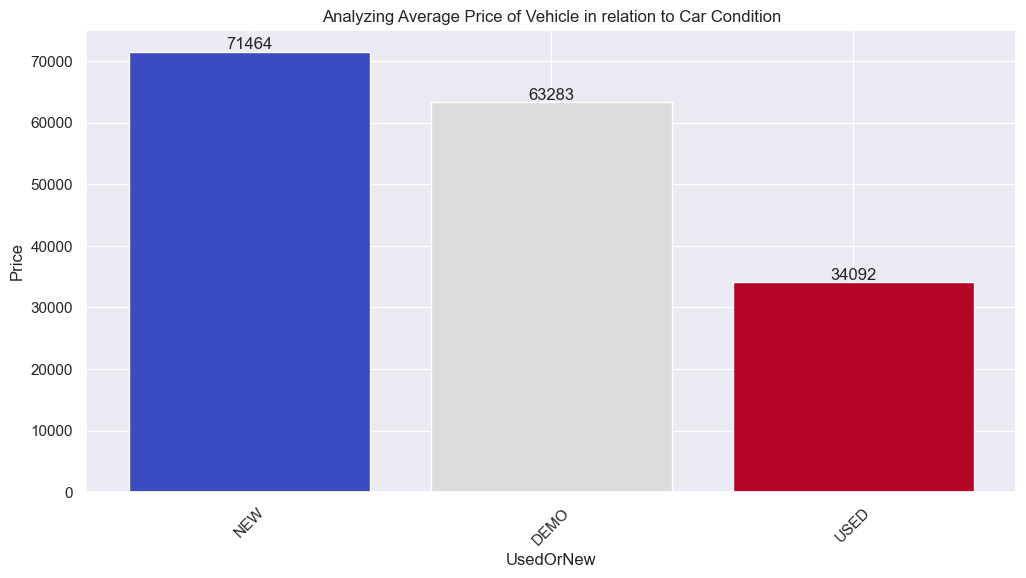

In [76]:
# Create a color gradient for the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(Price_wrt_Car_Condition)))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(Price_wrt_Car_Condition.index, Price_wrt_Car_Condition.values, color=colors)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.0f}', ha='center', va='bottom')

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('UsedOrNew')
plt.ylabel('Price')
plt.title('Analyzing Average Price of Vehicle in relation to Car Condition')

# Show the plot
plt.show()

### ***INSIGHT GENERATED***
- On average, `New Vehicles` sells more in the market than `Used Vehicles`.
- `New vehicles` have an average price of 71464
- `Used vehicles` have the lowest average price of 34092. 


In [77]:
#Showing the averauge fuel consimption of vehicle-based on Brand
Brand_fuel_consumption = Data1.groupby('Brand')['Fuel_Consumption(litres)'].mean().sort_values(ascending = False).round()

Brand_fuel_consumption

Brand
Ferrari          15.0
Lamborghini      15.0
Bentley          14.0
Rolls-Royce      14.0
HSV              13.0
                 ... 
Iveco             0.0
BYD               0.0
Hino              0.0
International     0.0
Polestar          0.0
Name: Fuel_Consumption(litres), Length: 75, dtype: float64

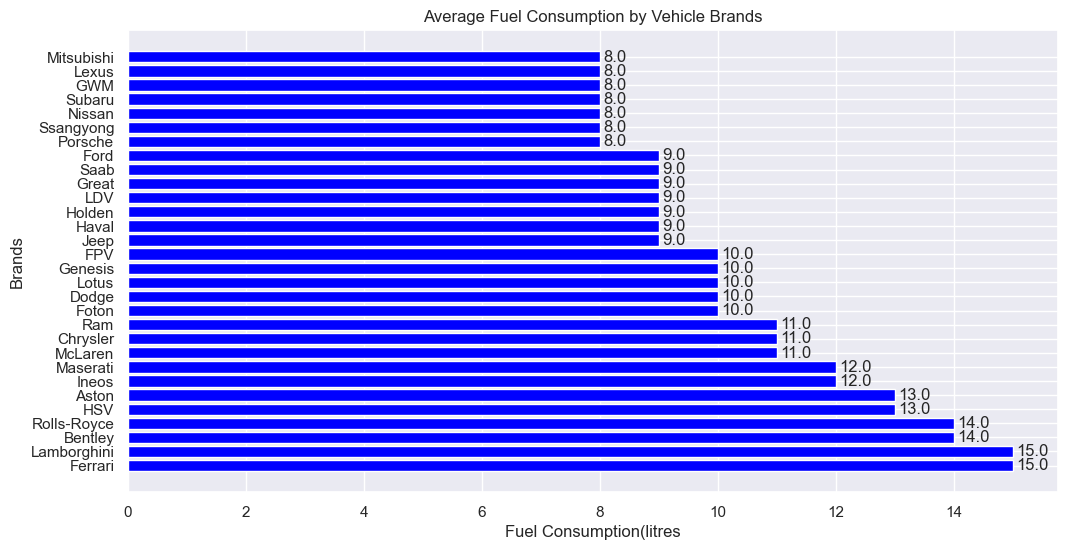

In [78]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Customize the bar chart
ax.barh(Brand_fuel_consumption[:30].index, Brand_fuel_consumption[:30].values, color='blue')

# Add data labels to the bars
for i, v in enumerate(Brand_fuel_consumption[:30].values):
    ax.text(v+0.05, i, str(v), ha='left', va='center')

# Add labels and title
ax.set_xlabel('Fuel Consumption(litres')
ax.set_ylabel('Brands')
ax.set_title('Average Fuel Consumption by Vehicle Brands')

# Show the plot
plt.show()


- ***On average, Ferarri, Lamborghini, Rolls-Royce, and HSV car brands consumes more fuel***

In [79]:
#Showing the variation of price of vehicle-based on Fuel Type
Price_wrt_FuelType = Data1.groupby('FuelType')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_FuelType

FuelType
Electric    86183.0
Leaded      81072.0
Hybrid      57416.0
Premium     49012.0
Diesel      42745.0
Other       34670.0
Unleaded    27014.0
LPG         16093.0
Name: Price, dtype: float64

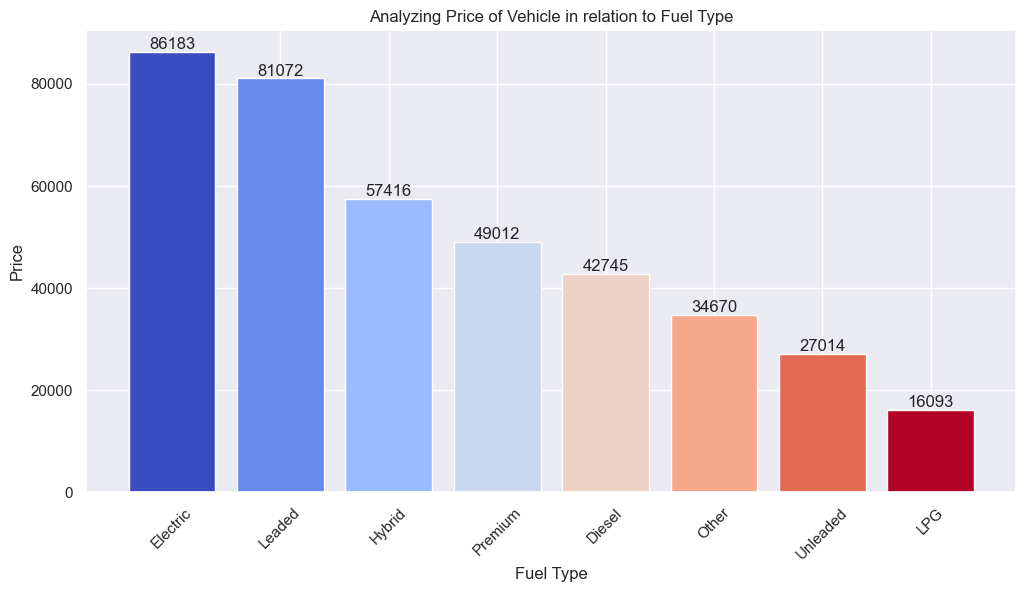

In [80]:
# Create a color gradient for the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(Price_wrt_FuelType)))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(Price_wrt_FuelType.index, Price_wrt_FuelType.values, color=colors)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.0f}', ha='center', va='bottom')

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Analyzing Price of Vehicle in relation to Fuel Type')

# Show the plot
plt.show()

### ***INSIGHT GENERATED***

- On average, `Electric` fuel type and `Leaded` fuel type sell more in the market than other fuel types.
- `Electric Fuel Type` indicates the highest average price among the group, which is 86,183.
- `Electric Vehicles` are the most expensive
- `Leaded Fuel Type` is second-highest with an average price of about 81,072.
- `LPG Fuel Type` indicating the lowest average price among all the fuel types, is approximately 16093.
- `LPG vehicles` being the least expensive


In [81]:
#Showing the variation of price of vehicle-based on Drive Type
Price_wrt_DriveType = Data1.groupby('DriveType')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_DriveType

DriveType
AWD      50872.0
Rear     46574.0
4WD      42514.0
Other    39547.0
Front    26568.0
Name: Price, dtype: float64

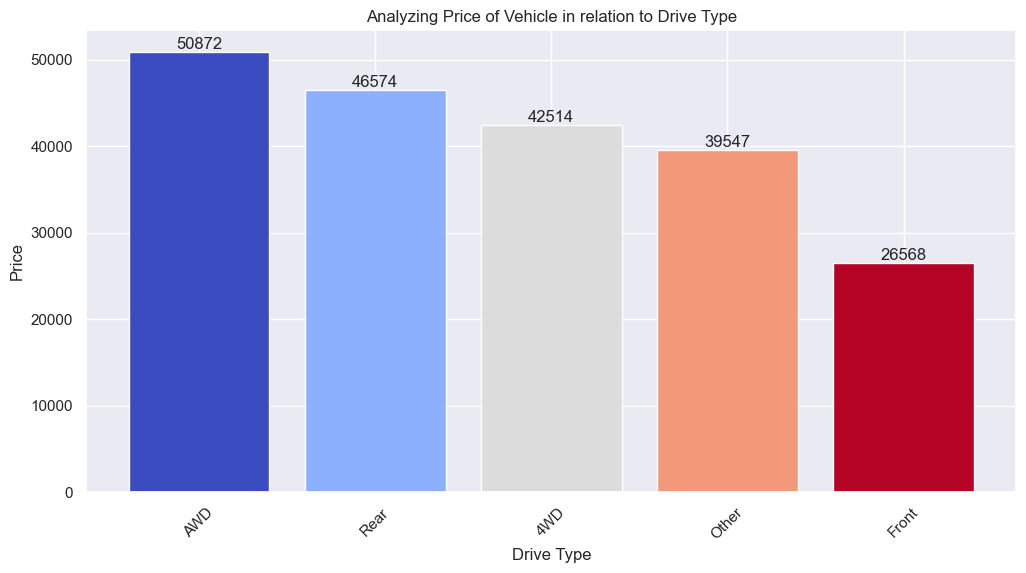

In [82]:
# Create a color gradient for the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(Price_wrt_DriveType)))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(Price_wrt_DriveType.index, Price_wrt_DriveType.values, color=colors)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.0f}', ha='center', va='bottom')

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.title('Analyzing Price of Vehicle in relation to Drive Type')

# Show the plot
plt.show()

### ***INSIGHT GENERATED***

- `AWD (All Wheel Drive)` shows an average price of approximately 50,872 making it the most purchased drive type.
- `Rear Wheel Drive` shows an average prcie of 46,574 making it the second highest drive type.
- `4WD (Four Wheel Drive)` shows an average price of about 41,323 making it the third highest after Rear.
- `Front Wheel` shows an average price of approximately 26,568 making it the least drive type.


In [83]:
#Showing the variation of price of vehicle-based on Cylinders in Engine
Price_wrt_Cylinders = Data1.groupby('CylindersinEngine')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_Cylinders

CylindersinEngine
12 cyl    319863.0
10 cyl    182960.0
8 cyl      93459.0
6 cyl      47502.0
5 cyl      36714.0
4 cyl      33508.0
3 cyl      31157.0
2 cyl      13492.0
Name: Price, dtype: float64

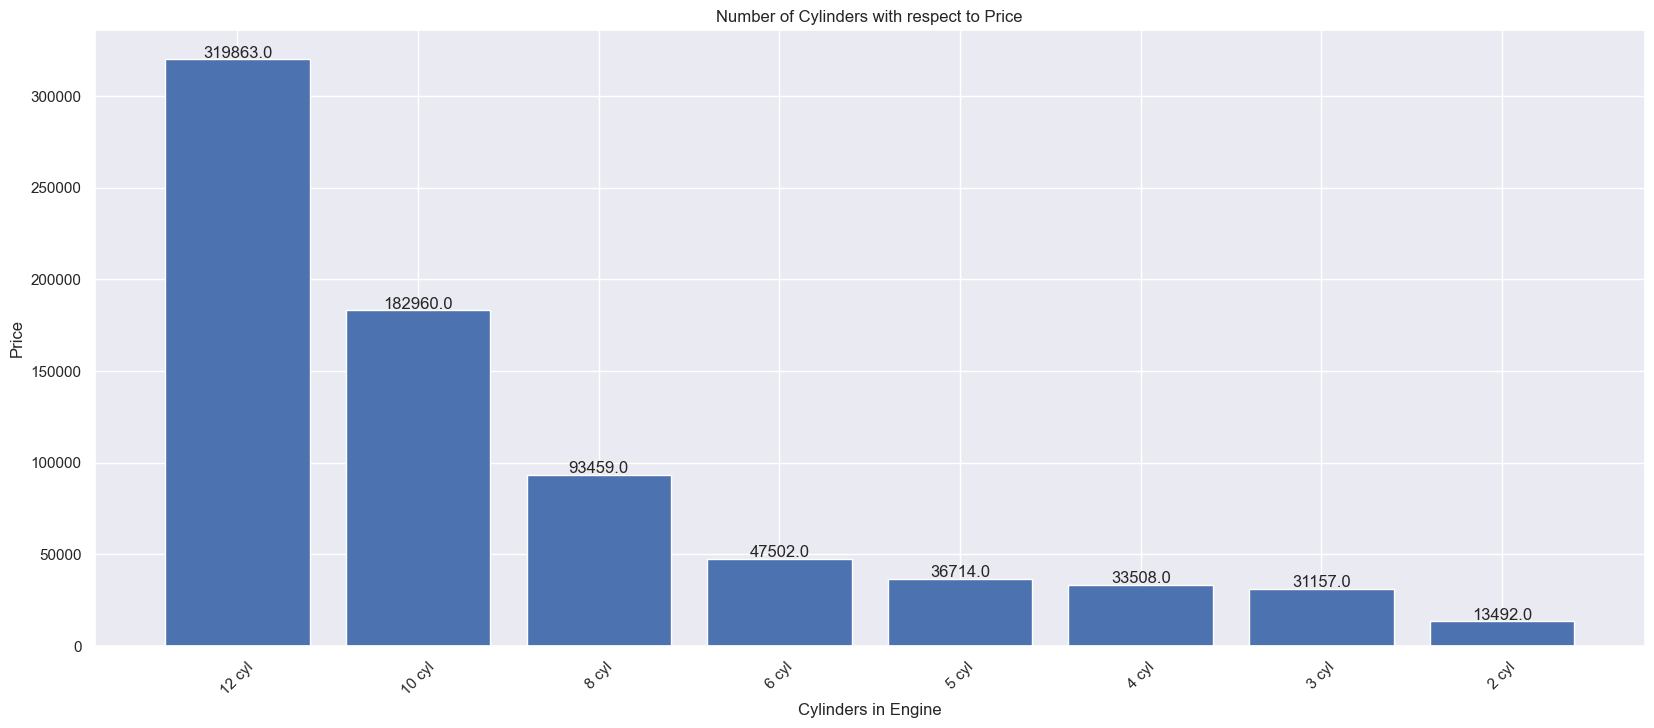

In [84]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Customize the bar chart
ax.bar(Price_wrt_Cylinders.index, Price_wrt_Cylinders.values)

# Add data labels to the bars
for i, v in enumerate(Price_wrt_Cylinders.values):
    ax.text(i, v+1000, str(v), ha='center')

# Add labels and title
ax.set_xlabel('Cylinders in Engine')
ax.set_ylabel('Price')
ax.set_title('Number of Cylinders with respect to Price')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### ***INSIGHT GENERATED***

- From the plot. we can see that the average price decreases as the number of cylinders decreases. 
- 12 cylinders has the highest average price, which is approximately 319,863, and `2 cylinders` has the lowest average price of 13,492. 
- The most expensive average price is associated with vehicles that have `12 cylinders`, followed by `10 cylinders` then `8 cylinders`
- Vehicles with more cylinders tend to have a higher price meaning it has positive correlation 

In [85]:
#Showing the variation of price of vehicle-based on Vechicle Brands
Price_wrt_Brands = Data1.groupby('Brand')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_Brands 

Brand
Lamborghini      542440.0
Ferrari          507441.0
McLaren          443588.0
International    341688.0
Rolls-Royce      329990.0
                   ...   
Opel              12172.0
Proton             7990.0
Saab               6700.0
Geely              6450.0
Smart              5985.0
Name: Price, Length: 75, dtype: float64

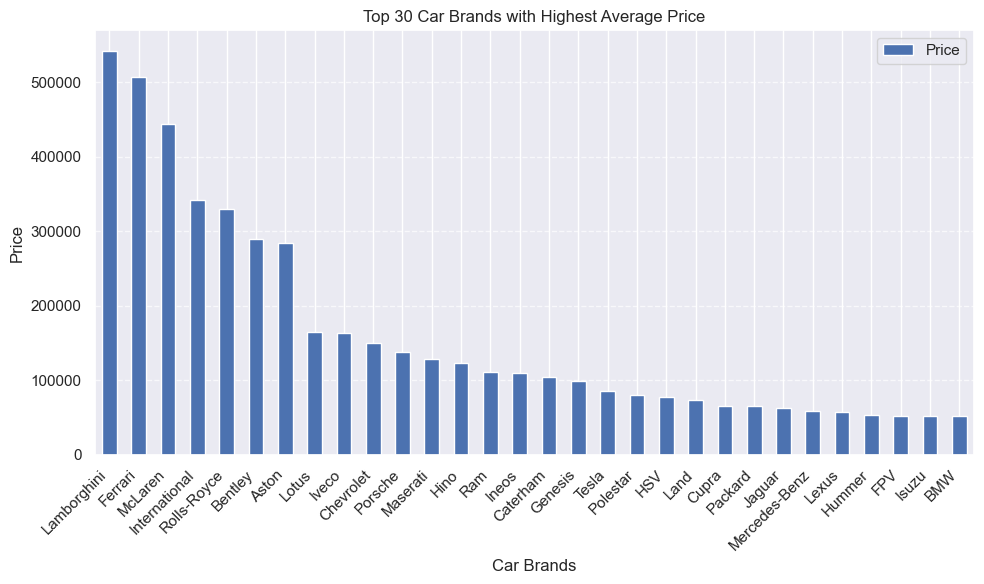

In [86]:
#plot for the Car Brands 
Price_wrt_Brands[:30].plot(kind='bar', figsize=(10, 6), rot = 45)
plt.title('Top 30 Car Brands with Highest Average Price')
plt.xlabel('Car Brands')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### ***INSIGHT GENERATED***

- The car brand with the highest average price is `Lamborghini`, with a price of 542,440 Australian dollars.
- It is followed by `Ferrari`, which has a slightly lower average price compared to Lamborghini with a price of 507,441 Australian dollars.
- The third car brand is `McLaren`, with an average price of 443,558 Australian dollars.
- Other notable high-price brands include `International, Rolls-Royce, Bentley, and Aston Martin`, all of which have average prices above 200,000 dollars.
- We have car brand `Smart` having the lowest average price of 5985 Australian dollars

In [87]:
#Showing the variation of price of vehicle-based on Vechicle Types
Price_wrt_CarType = Data1.groupby('Car/Suv')['Price'].mean().sort_values(ascending = False).round()

Price_wrt_CarType 

Car/Suv
Lorbek Luxury Cars Sydney                 489122.0
TCB Bespoke                               399990.0
Bodyfit Autos                             398880.0
Aston Martin Queensland                   369000.0
Ferntree Gully Hyundai & Kia Used Cars    315888.0
                                            ...   
Coastal Car Talk                            7500.0
Triple F Autos Pty Ltd                      7323.0
Hoppers Crossing Motor Garage               6999.0
Tony's Car Sales                            4999.0
Gold Coast Wholesale Cars                   3990.0
Name: Price, Length: 610, dtype: float64

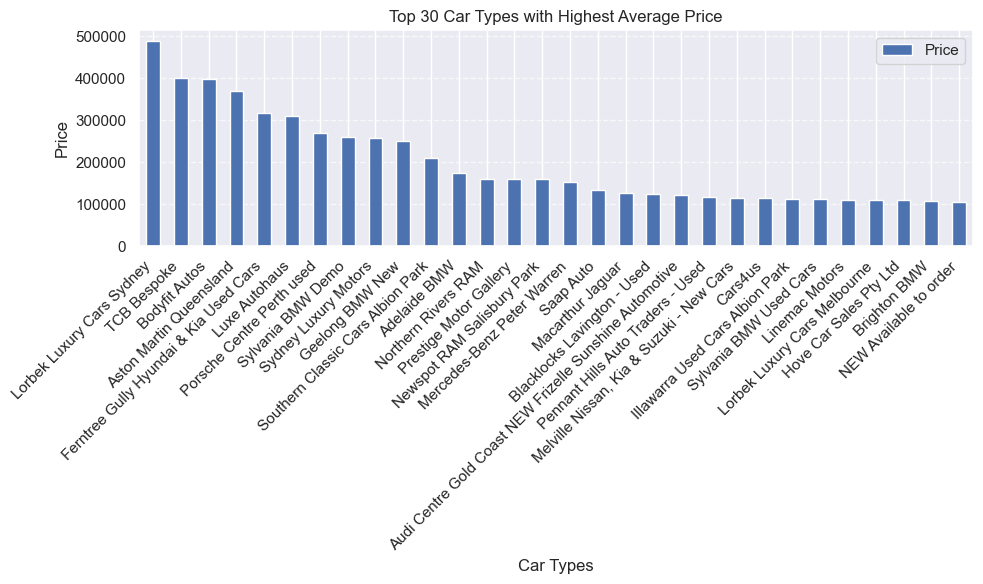

In [88]:
#plot for the Car Brands 
Price_wrt_CarType[:30].plot(kind='bar', figsize=(10, 6), rot = 45)
plt.title('Top 30 Car Types with Highest Average Price')
plt.xlabel('Car Types')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### ***INSIGHT GENERATED***

- The car type with the highest average price is `Lorbek Luxury Cars Sydney`, with an average price of 489,122 Australian dollars.
- It is followed by `TCB Bespoke`, which has a slightly lower average price compared to Lorbek Luxury Cars Sydney with an average price of 399,990 Australian dollars.
- The third car type is `Bodyfit Autos`, with an average price of 398,880 Australian dollars.
- We have car type `Gold Coast Wholesale Cars` having the lowest average price of 3990 Australian dollars

In [89]:
#Visualizing number of cars seats and doors
doors_counts = Data1["Doors"].value_counts()
seats_counts = Data1["Seats"].value_counts()

In [90]:
Grouped_CarBrands = Data1.groupby('Brand')[["Doors", "Seats"]].mean().astype('int').sort_values(by='Doors', ascending=False)[:30]
Grouped_CarBrands

Doors  Seats
Brand                    
Polestar         5      5
Volvo            4      5
Opel             4      5
MG               4      4
Geely            4      5
Genesis          4      5
Peugeot          4      4
Haval            4      5
Packard          4      5
Honda            4      5
Ram              4      5
Hummer           4      5
Hyundai          4      5
Ineos            4      4
Alfa             4      5
Mazda            4      5
Kia              4      5
Mahindra         4      5
Proton           4      5
Land             4      5
Renault          4      4
Ssangyong        4      5
Volkswagen       4      4
Toyota           4      5
Tesla            4      5
BYD              4      4
Suzuki           4      4
Rolls-Royce      4      5
Chery            4      5
Subaru           4      4

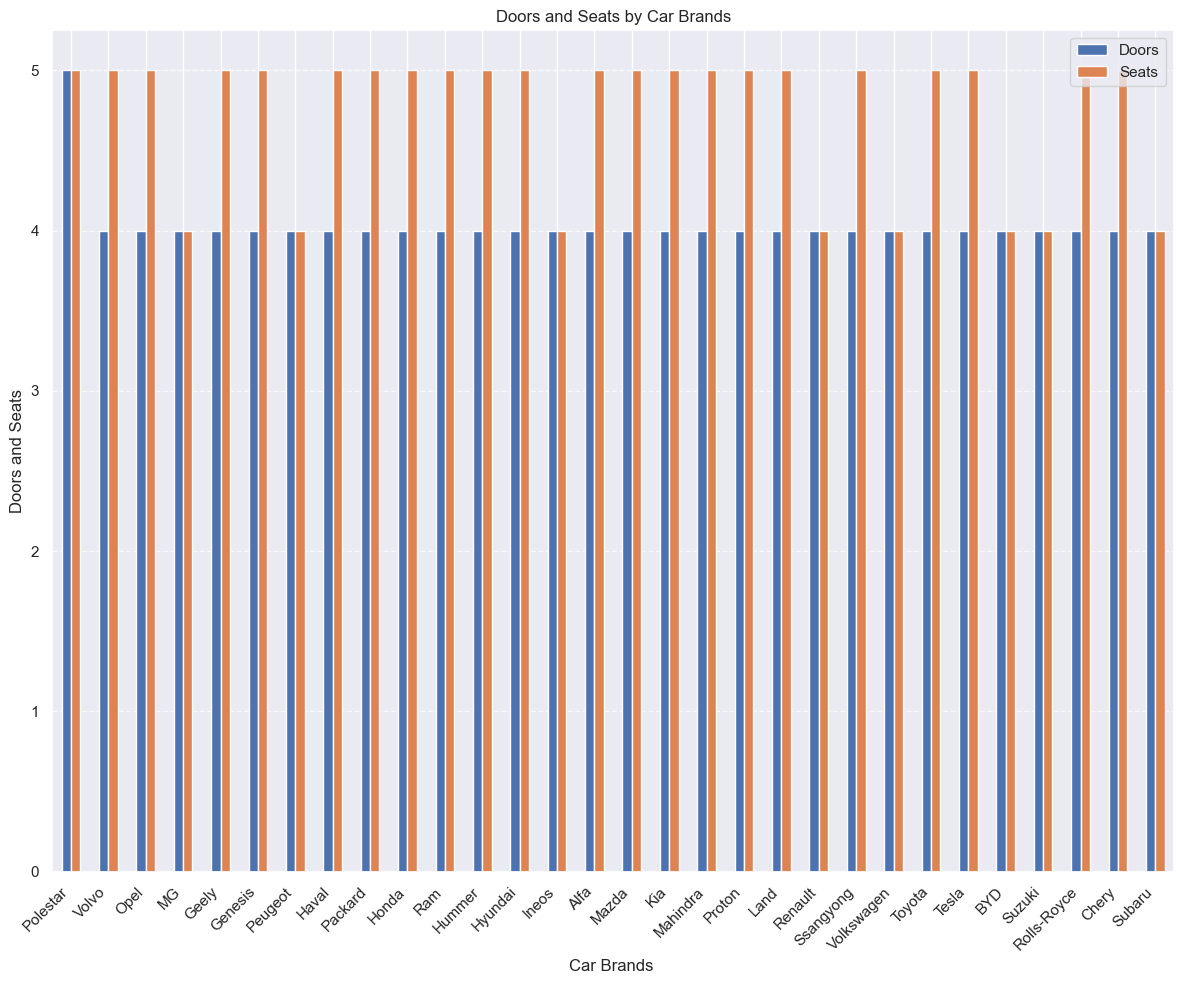

In [91]:
#plot for the Grouped Car Brands along with its Doors and Seats
Grouped_CarBrands.plot(kind='bar', figsize=(12, 10))
plt.title('Doors and Seats by Car Brands')
plt.xlabel('Car Brands ')
plt.ylabel('Doors and Seats')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Doors", "Seats"])
plt.tight_layout()
plt.show()

***Polestar car brand seems to be the cr brand wilth average of 5 doors and 5 car seats***

## Multivariate Analysis
- considering the relationship between two or more variables and its visualization.

In [92]:
# Vehicle Brands, Vehicle Condition and Average Vehicle Price
Brand_Condition_price = Data1.groupby(['UsedOrNew', 'Brand'])['Price'].mean().round().unstack('UsedOrNew').fillna(0)
Brand_Condition_price

UsedOrNew       DEMO       NEW      USED
Brand                                   
Abarth       44824.0       0.0   37490.0
Alfa             0.0       0.0   24296.0
Aston       369000.0  437400.0  204993.0
Audi         97542.0  112100.0   44347.0
BMW         144062.0  119521.0   44705.0
...              ...       ...       ...
Tata             0.0       0.0   16990.0
Tesla            0.0       0.0   85285.0
Toyota           0.0   53655.0   39466.0
Volkswagen   58603.0   63497.0   30579.0
Volvo        85187.0   79637.0   32718.0

[75 rows x 3 columns]

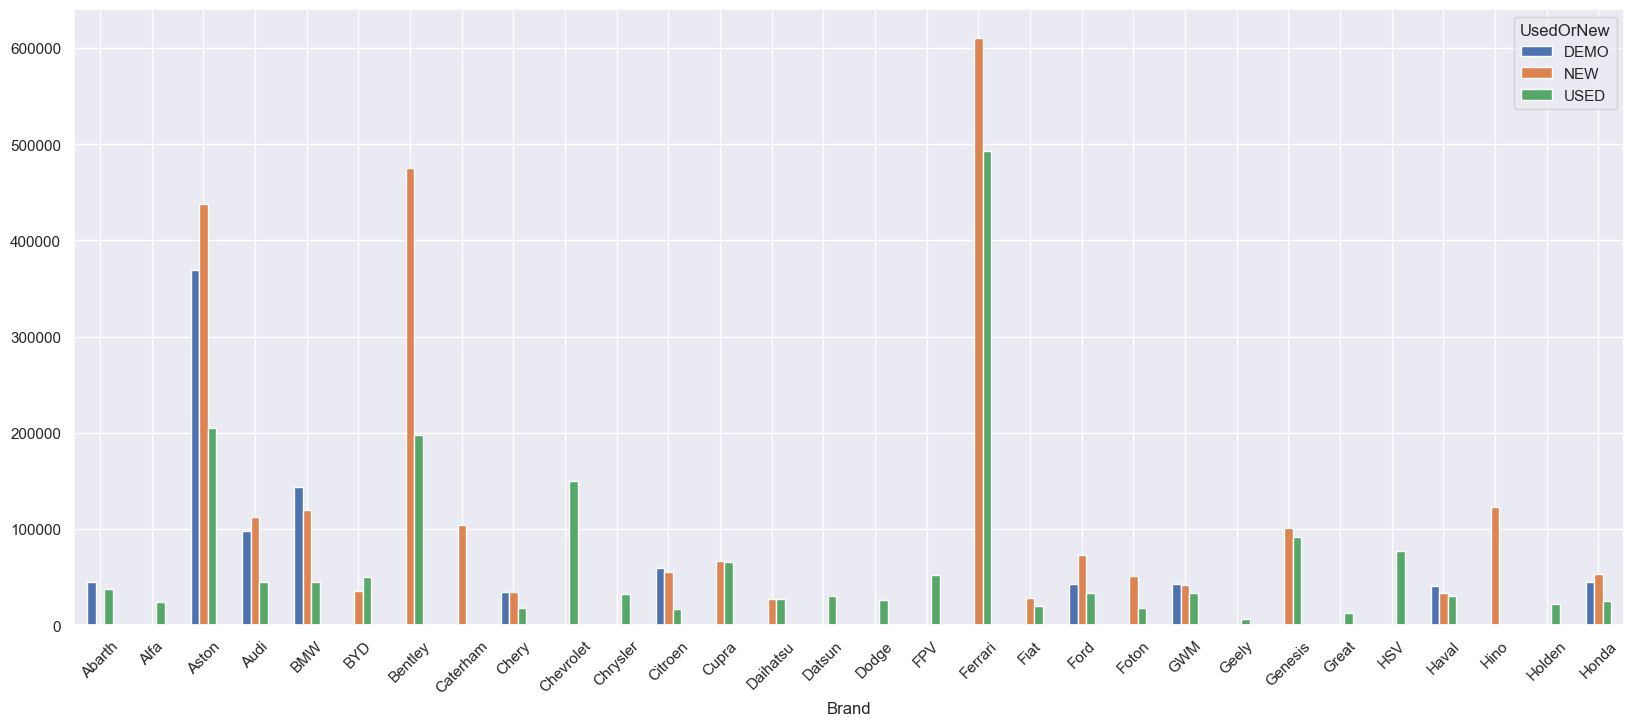

In [93]:
# plot the Summary table #restriciting to see just the first 30 brands(sample)
Brand_Condition_price[:30].plot.bar(figsize = (20, 8))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation=45)
plt.show()

***We have `Ferrari` showing the highest average of New and Used cars***

In [94]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16376 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16376 non-null  object 
 1   Year                             16376 non-null  int32  
 2   Model                            16376 non-null  object 
 3   Car/Suv                          16376 non-null  object 
 4   Title                            16376 non-null  object 
 5   UsedOrNew                        16376 non-null  object 
 6   Transmission                     16376 non-null  object 
 7   DriveType                        16376 non-null  object 
 8   FuelType                         16376 non-null  object 
 9   Kilometres                       16376 non-null  float64
 10  ColourExtInt                     16376 non-null  object 
 11  Location                         16376 non-null  object 
 12  CylindersinEngine      

In [95]:
# Create a heatmap to show corelation
# Create a correlation matrix
columns = ['Doors', 'Seats', 'Price', 'Engine_Volumes(litres)', 'Fuel_Consumption(litres)', 'Kilometres','Year']           

# Select the numerical features from the dataframe
numerical_features = Data1[columns]

# Create a correlation matrix
corr_matrix = numerical_features.corr().round(2)

corr_matrix


Doors  Seats  Price  Engine_Volumes(litres)  \
Doors                      1.00   0.36  -0.18                   -0.26   
Seats                      0.36   1.00  -0.04                    0.05   
Price                     -0.18  -0.04   1.00                    0.29   
Engine_Volumes(litres)    -0.26   0.05   0.29                    1.00   
Fuel_Consumption(litres)  -0.17   0.08   0.02                    0.41   
Kilometres                -0.10  -0.03  -0.34                    0.13   
Year                       0.05   0.03   0.35                   -0.08   

                          Fuel_Consumption(litres)  Kilometres  Year  
Doors                                        -0.17       -0.10  0.05  
Seats                                         0.08       -0.03  0.03  
Price                                         0.02       -0.34  0.35  
Engine_Volumes(litres)                        0.41        0.13 -0.08  
Fuel_Consumption(litres)                      1.00        0.24 -0.28  
Kilometres                                    0.24        1.00 -0.67  
Year                                         -0.28       -0.67  1.00

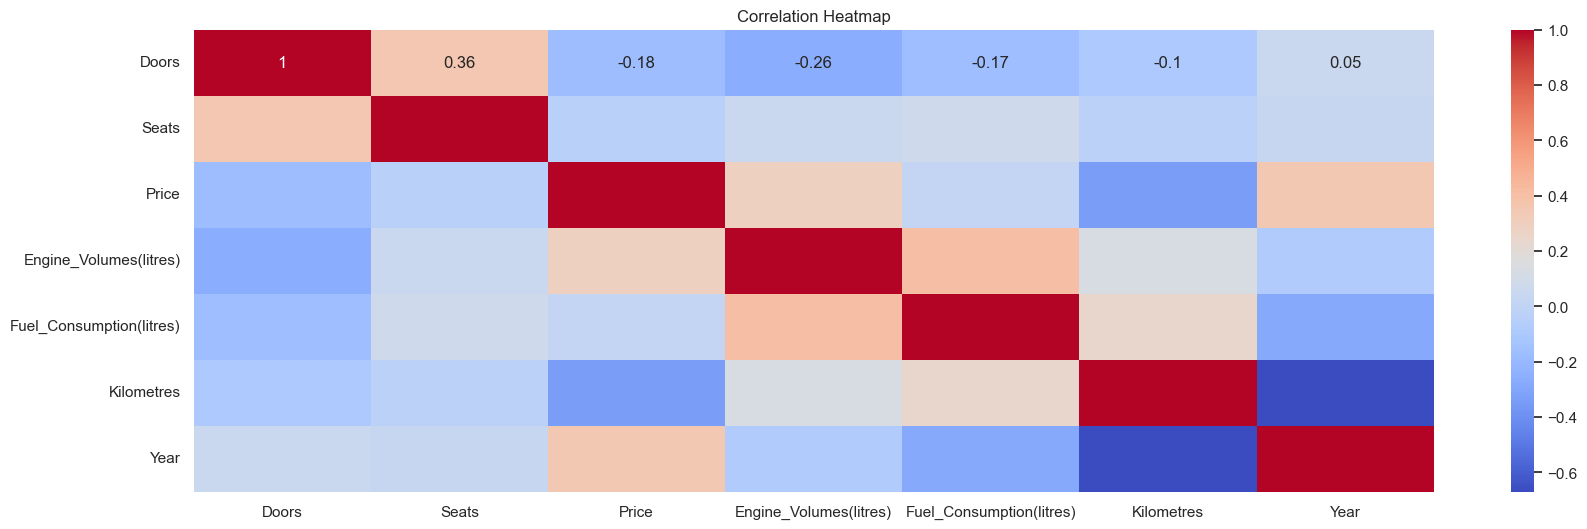

In [96]:
# Create a heatmap
plt.figure(figsize = (20, 6));
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***From the heat map, we can tell that  ear and Engine_Volumes(litres) have the highest positive corelation value to Price***